In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

### **Beijing Dataset**

In [ ]:
# Upload all datasets
Aotizhongxin = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Dingling = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
Changping = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
Dongsi = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
Guanyuan = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
Gucheng = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
Huairou = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
Nongzhanguan = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
Shunyi = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
Tiantan = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
Wanliu = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
Wanshouxigong = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [ ]:
# Step 1: Combine all station DataFrames into one
combined_df = pd.concat([Aotizhongxin, Dingling, Changping, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong])

combined_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
35060  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
35061  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
35062  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
35063  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1      -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3      -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4      -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...     ...     ...   ...   ...  ...   ...            ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 18 columns]

First Part of EDA would be
1. Comparison Between Stations
2. Yearly, Monthly and Daily Comparison

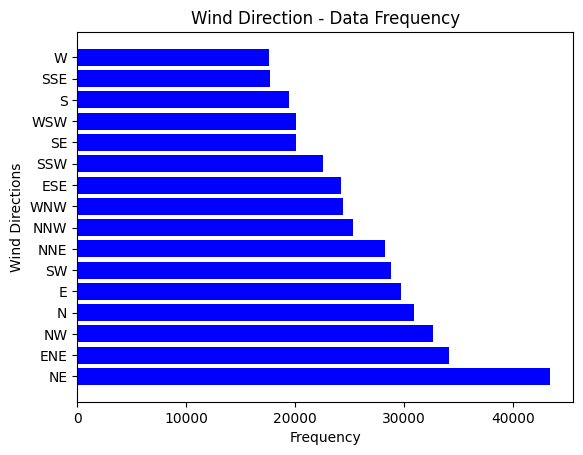

Number of Wind Direction 
wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64


In [ ]:
# Number of sample according to WinDir
plt.figure()
plt.barh(combined_df["wd"].value_counts().index, combined_df["wd"].value_counts(), color = "b")
plt.xlabel("Frequency")
plt.ylabel("Wind Directions")
plt.title("Wind Direction - Data Frequency")
plt.show()
print(f"Number of Wind Direction \n{combined_df['wd'].value_counts()}")

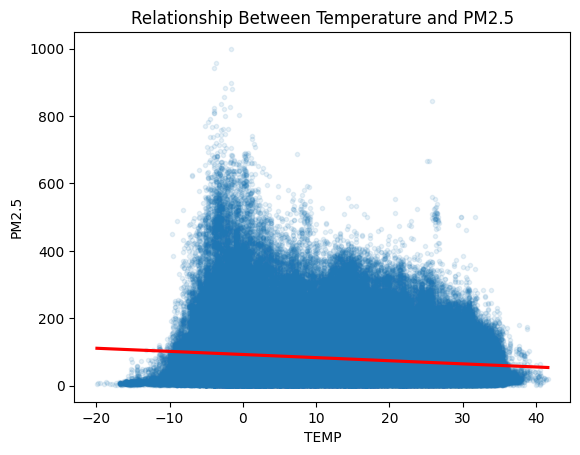

In [ ]:
# Relationship between temperature and PM2.5

sns.regplot(x='TEMP', y='PM2.5', data=combined_df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()

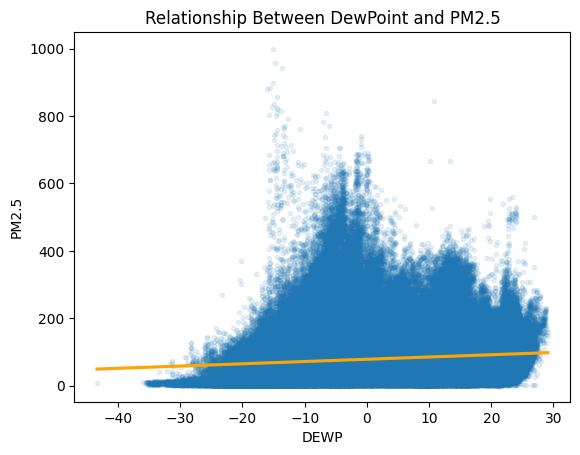

In [ ]:
sns.regplot(x='DEWP', y='PM2.5', data=combined_df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"orange"})
plt.title('Relationship Between DewPoint and PM2.5')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


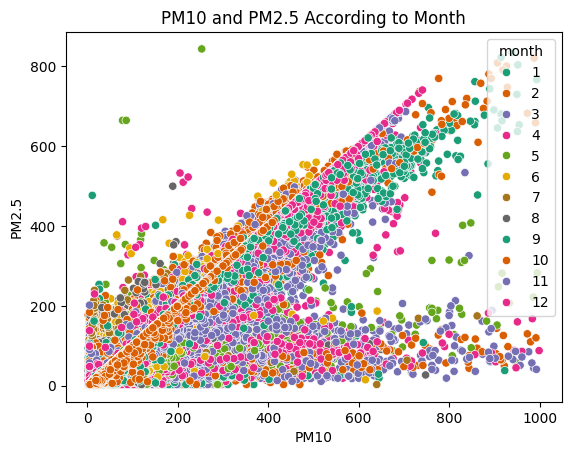

In [ ]:
combined_df = combined_df.reset_index(drop=True)

# Now try the scatterplot again
sns.scatterplot(x='PM10', y='PM2.5', hue='month', data=combined_df, palette="Dark2")
plt.title('PM10 and PM2.5 According to Month')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


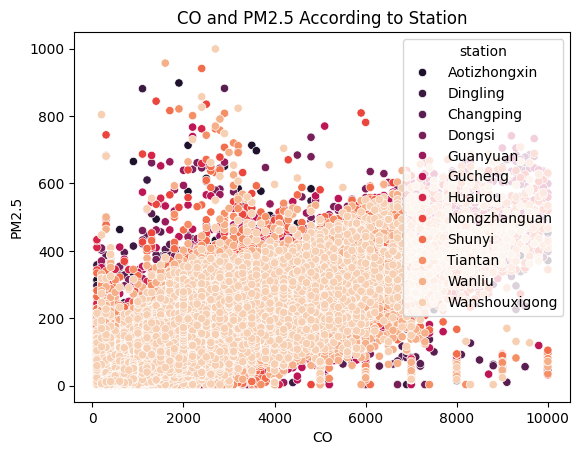

In [ ]:
sns.scatterplot(x='CO', y='PM2.5', hue='station', data=combined_df, palette = "rocket")
plt.title('CO and PM2.5 According to Station')
plt.show()

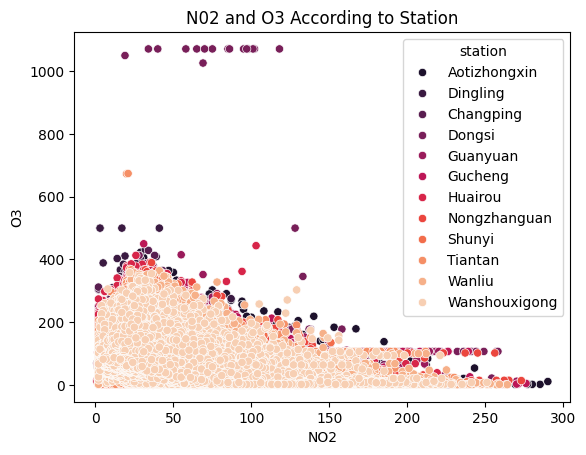

In [ ]:
sns.scatterplot(x='NO2', y='O3', hue='station', data=combined_df, palette = "rocket")
plt.title('N02 and O3 According to Station')
plt.show()

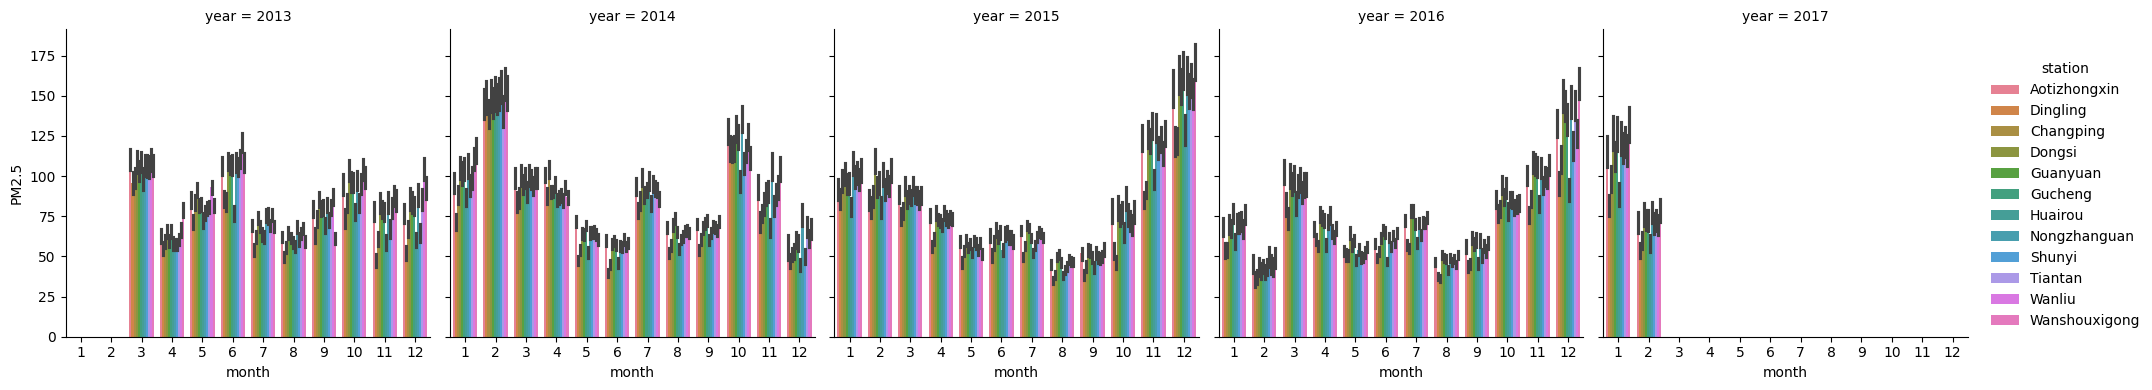

In [ ]:
sns.catplot(x="month", y="PM2.5",  hue="station", col="year",
                data=combined_df, kind="bar", height=4)
plt.show()

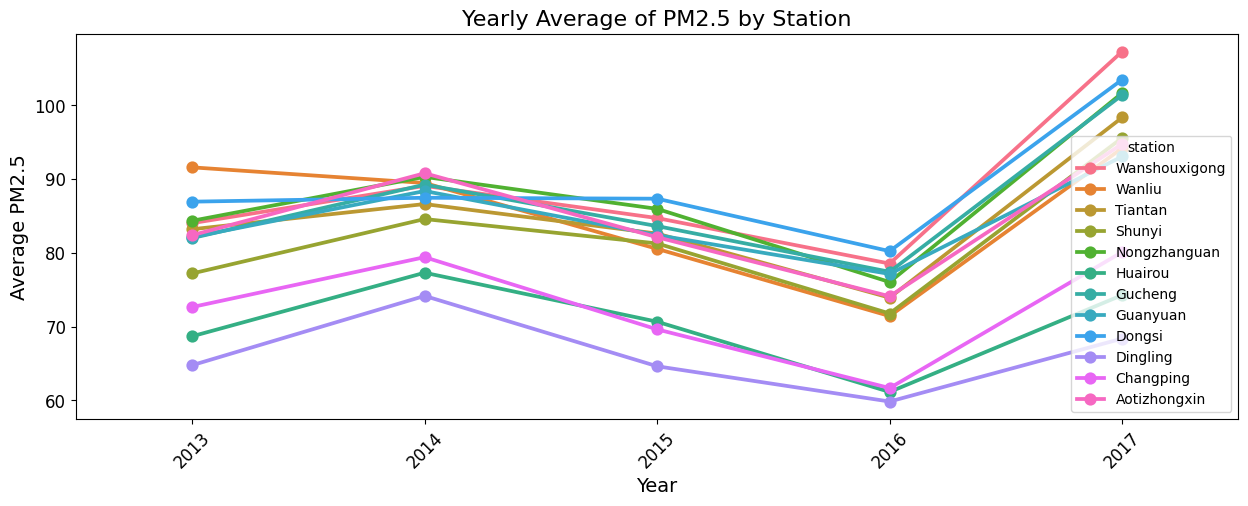

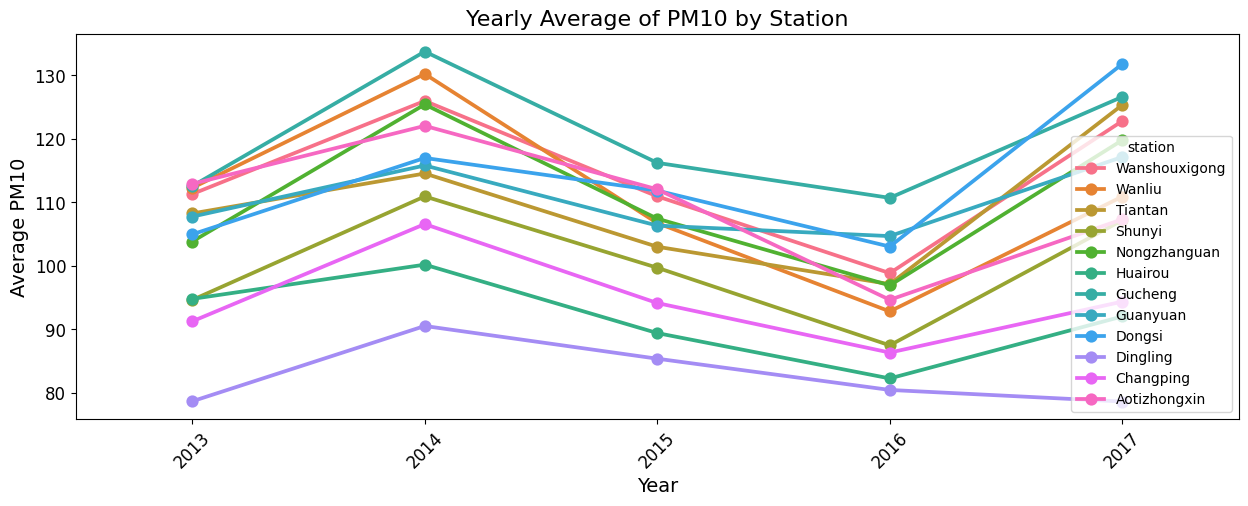

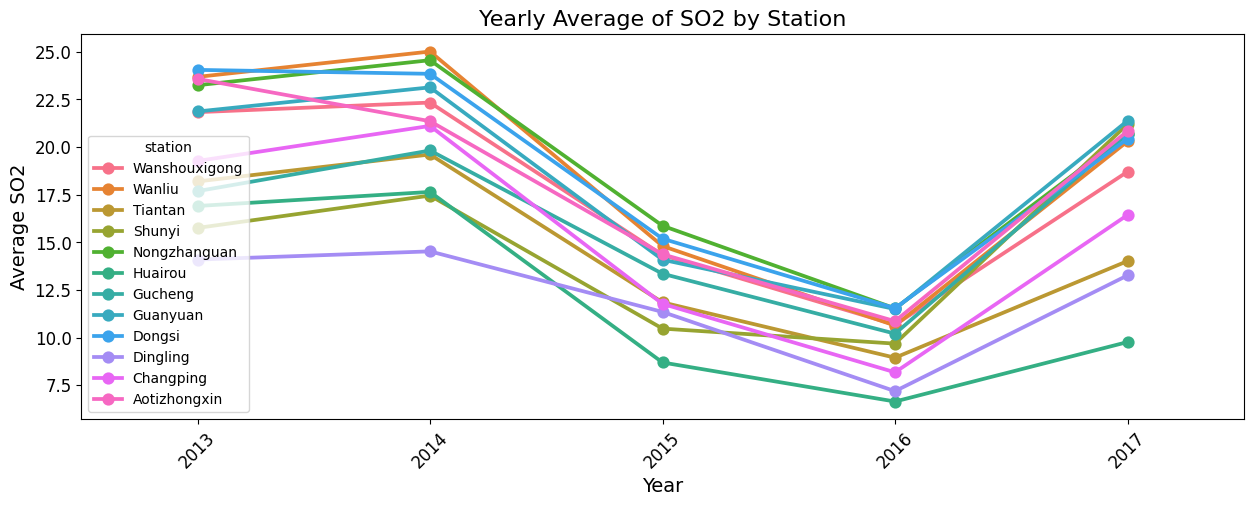

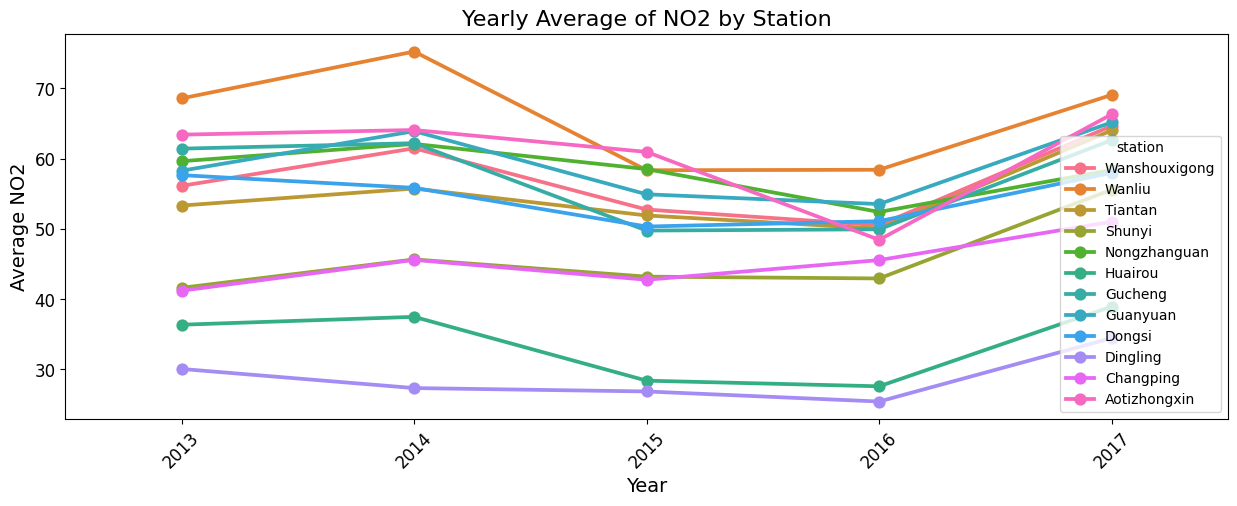

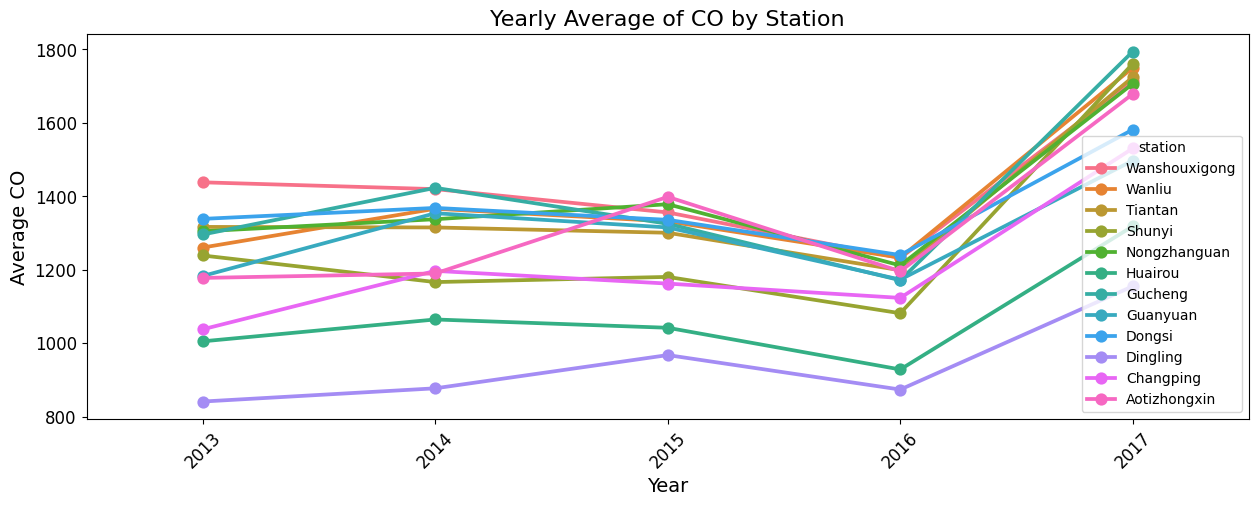

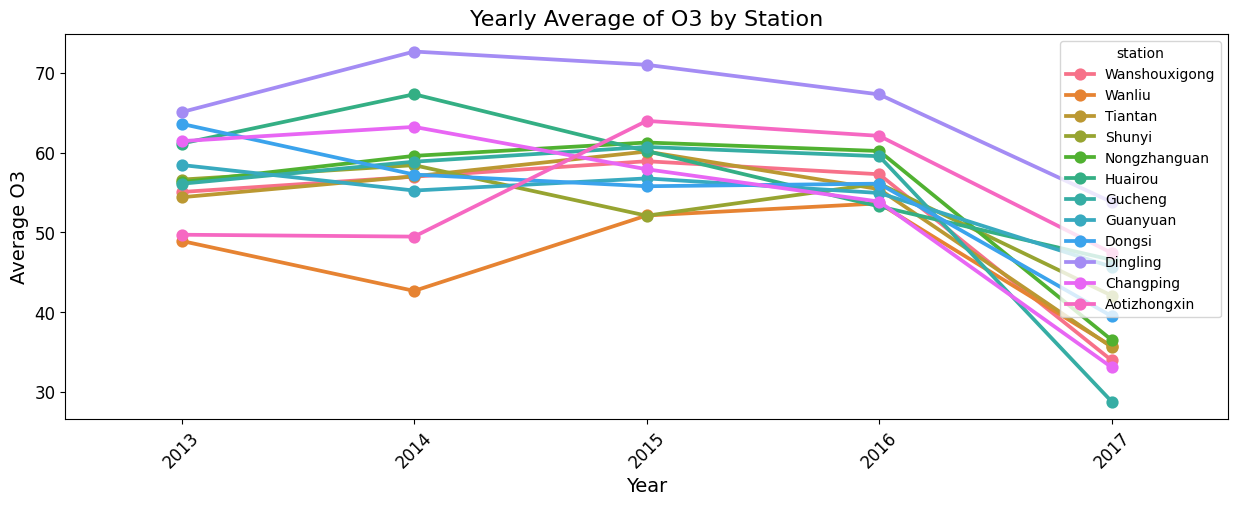

In [ ]:
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for i in compounds:
    df = combined_df[[i, 'year', 'station']].groupby(["year",
                                               "station"]).mean().reset_index().sort_values(by=['station',
                                                                                                'year'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=df, hue="station")
     # Improve plot aesthetics
    plt.title(f'Yearly Average of {i} by Station', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(f'Average {i}', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)
    plt.show()

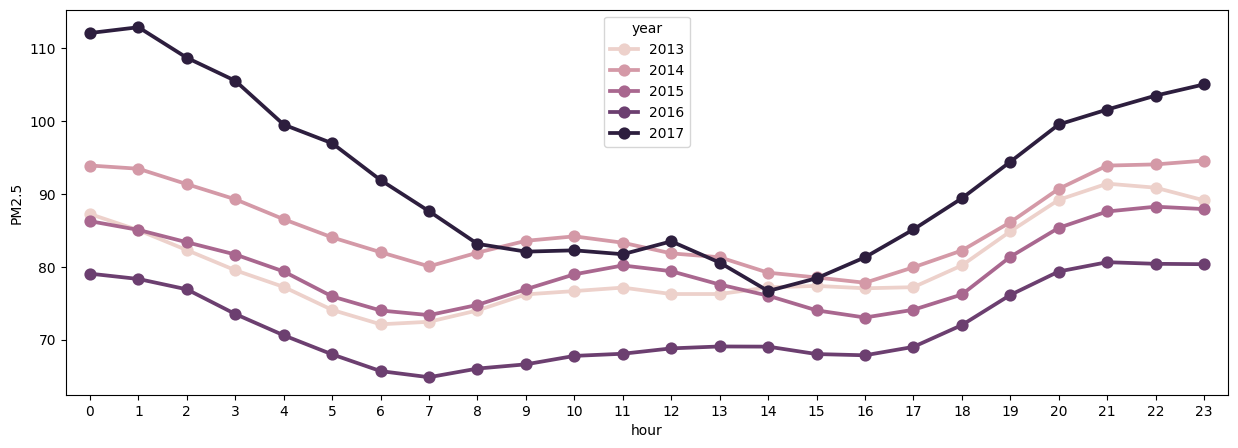

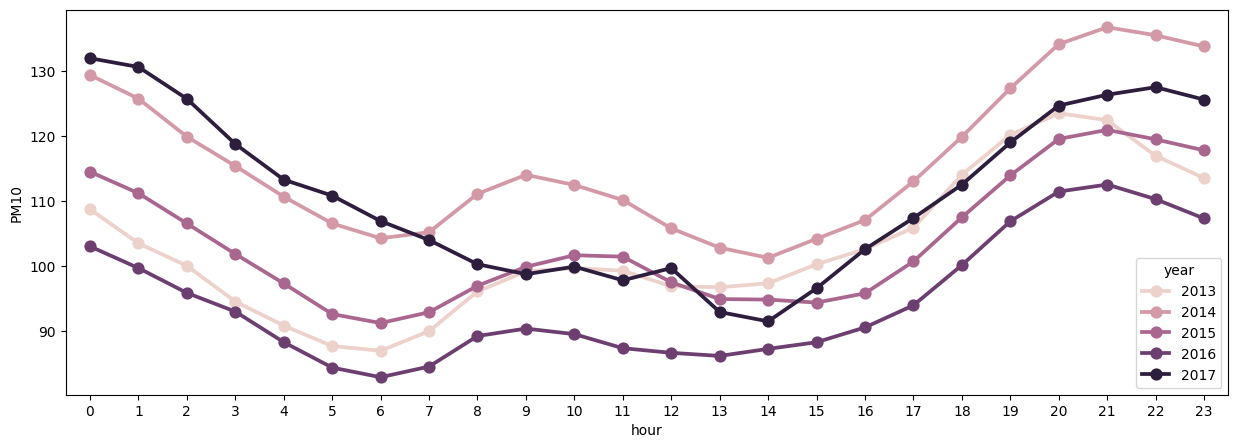

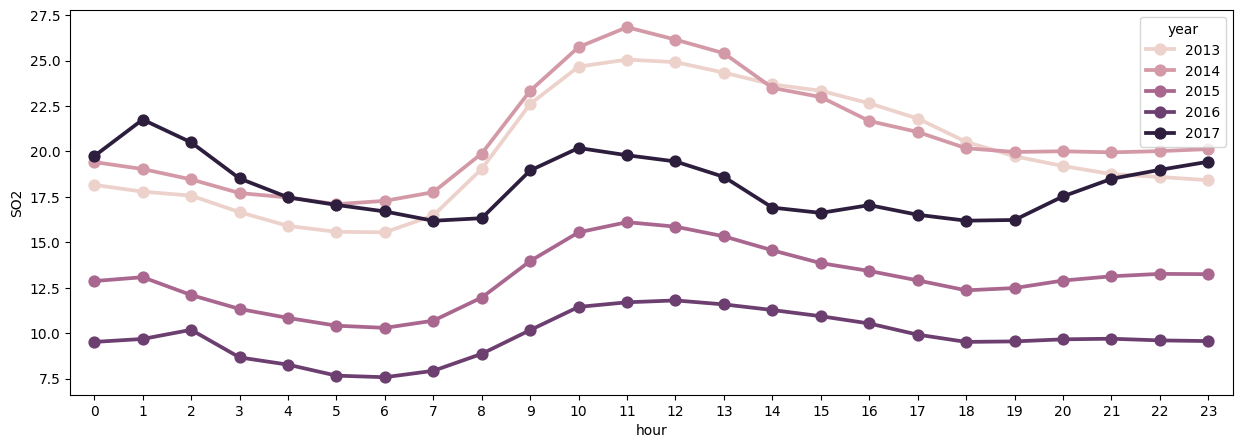

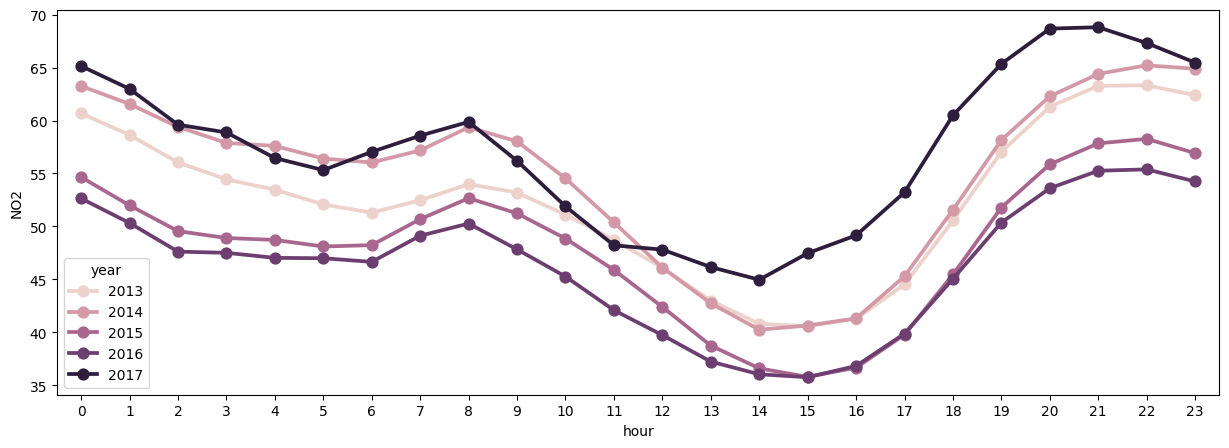

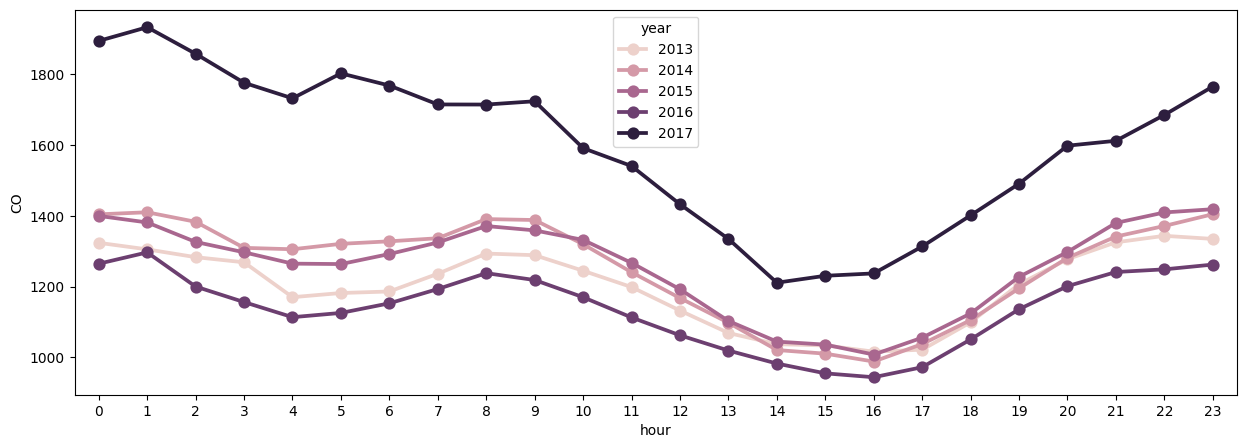

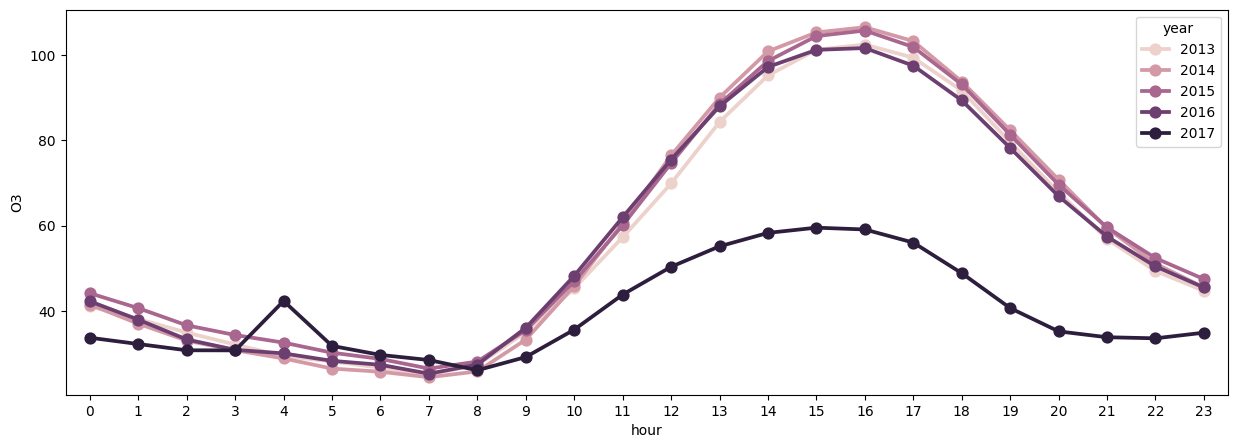

In [ ]:
for i in compounds:
    df = combined_df[[i, 'hour', 'year']].groupby(["year",
                                                 "hour"]).mean().reset_index().sort_values(by=['year',
                                                                                                 'hour'], ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='hour', y=i, data=df, hue="year")
    plt.show()

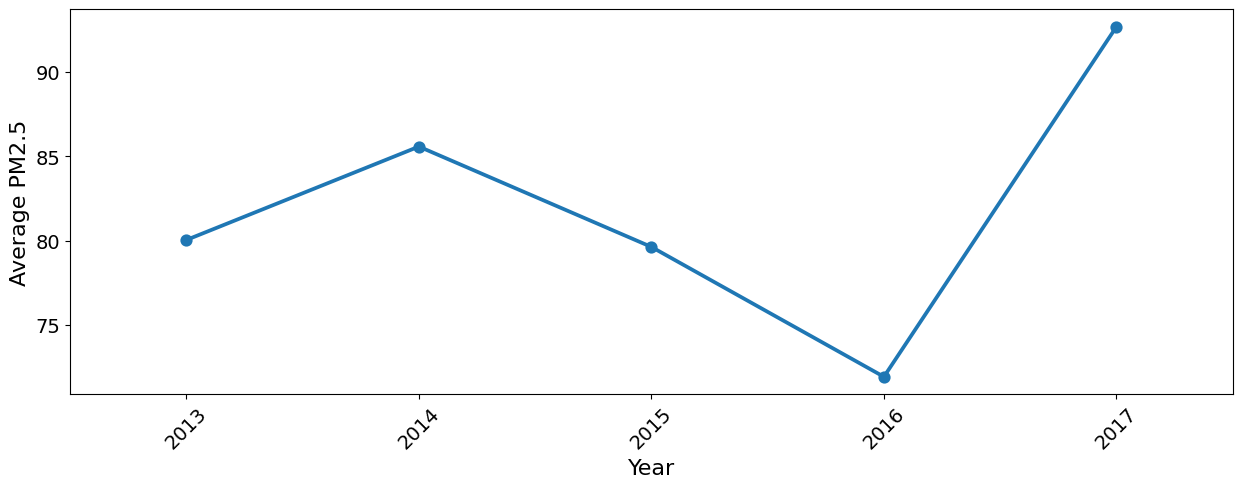

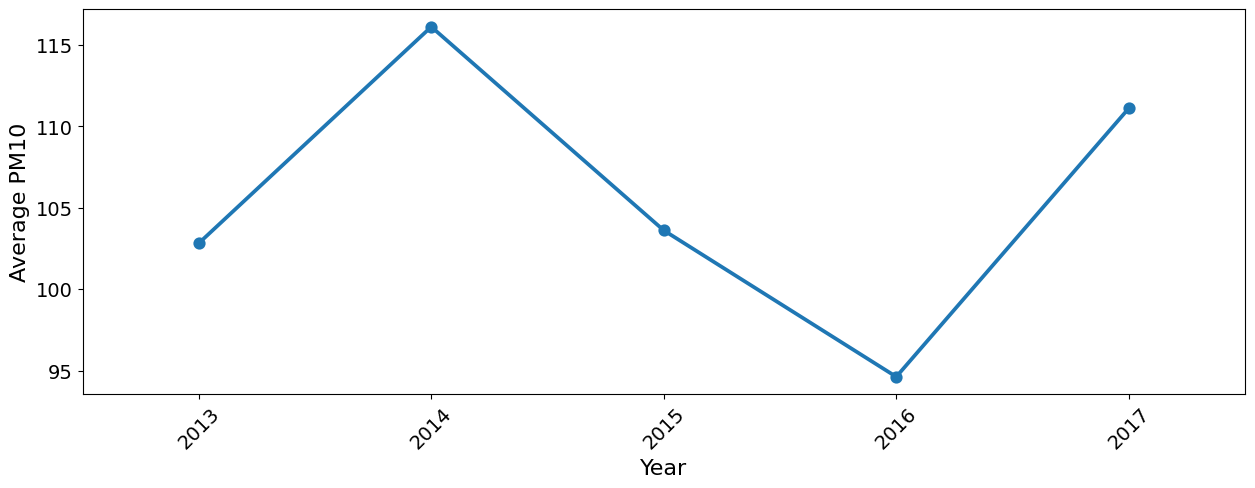

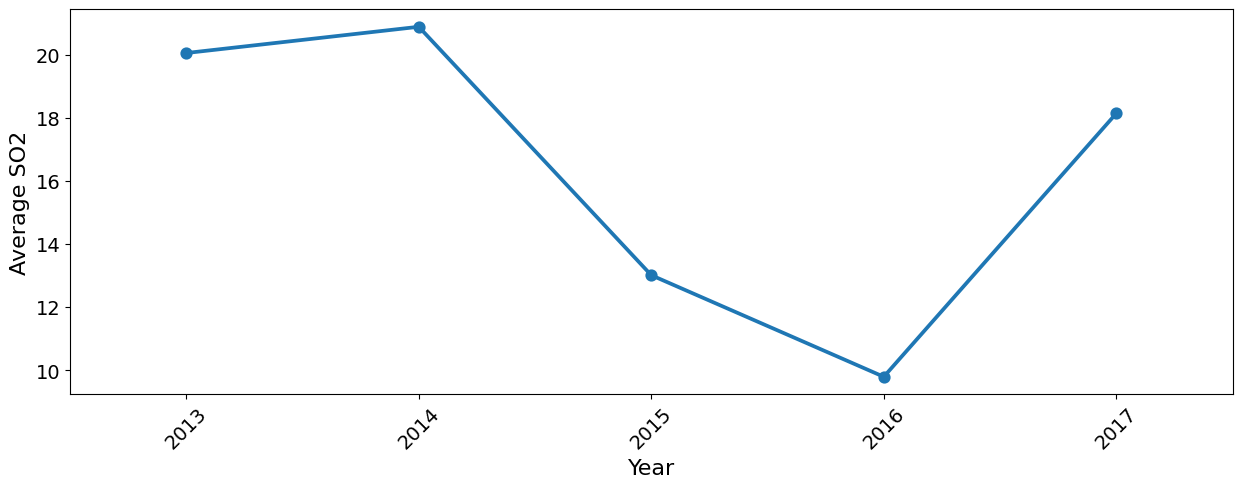

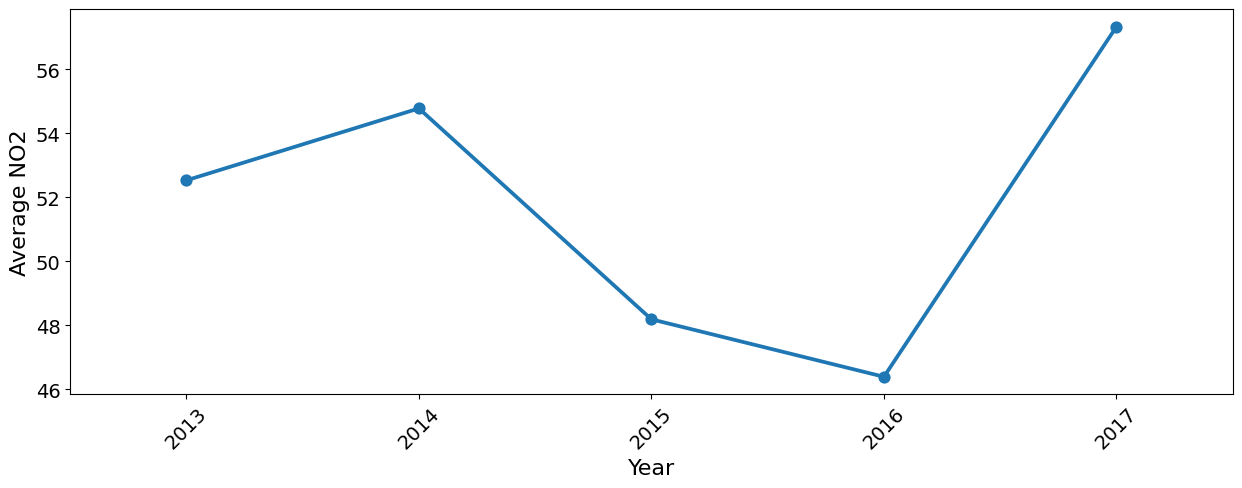

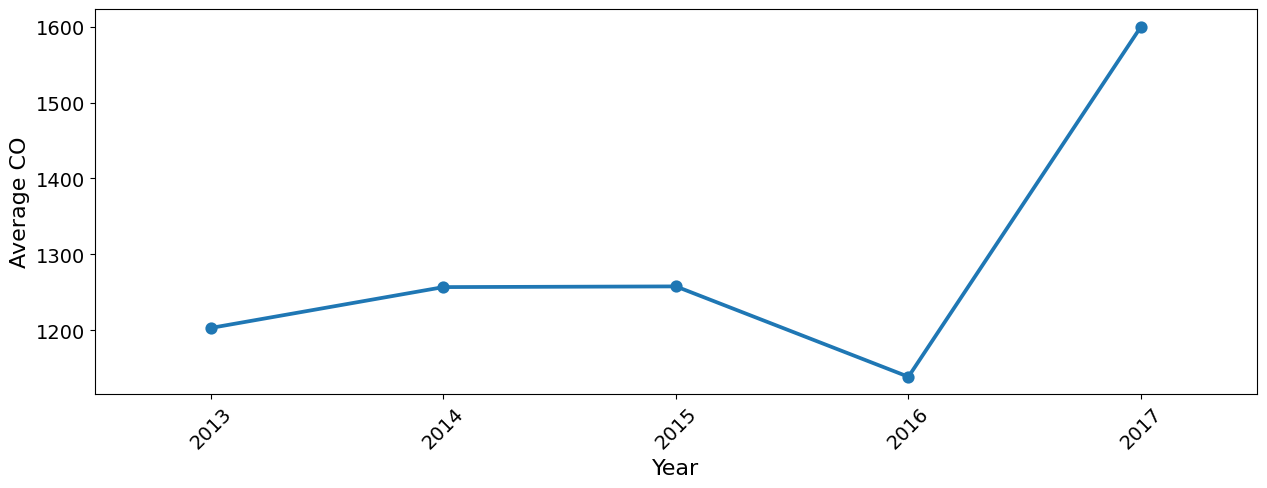

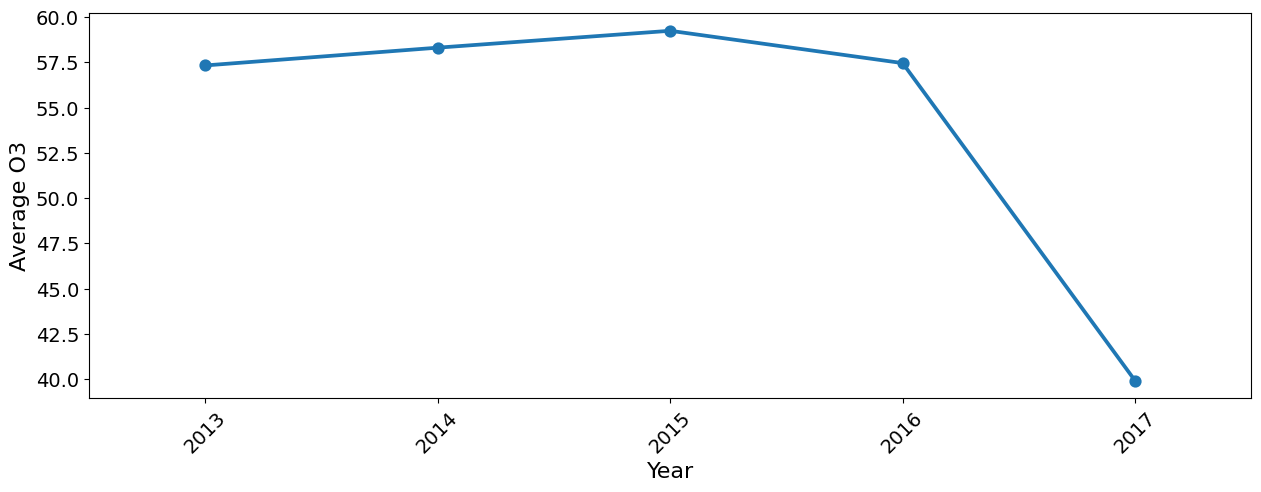

In [ ]:
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for i in compounds:
    df = combined_df[[i, 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=df)

    plt.xlabel('Year', fontsize=16)
    plt.ylabel(f'Average {i}', fontsize=16)
    plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=14)
    plt.show()

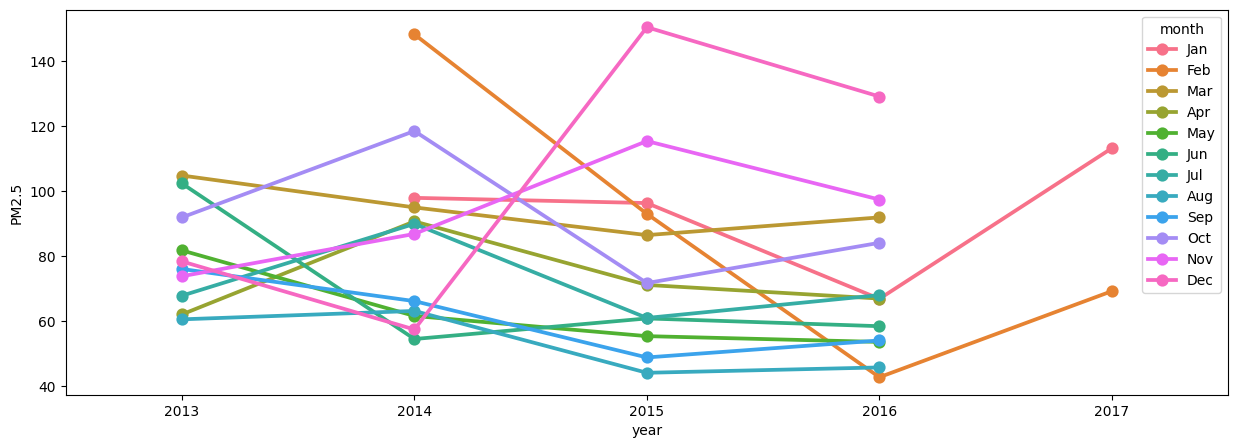

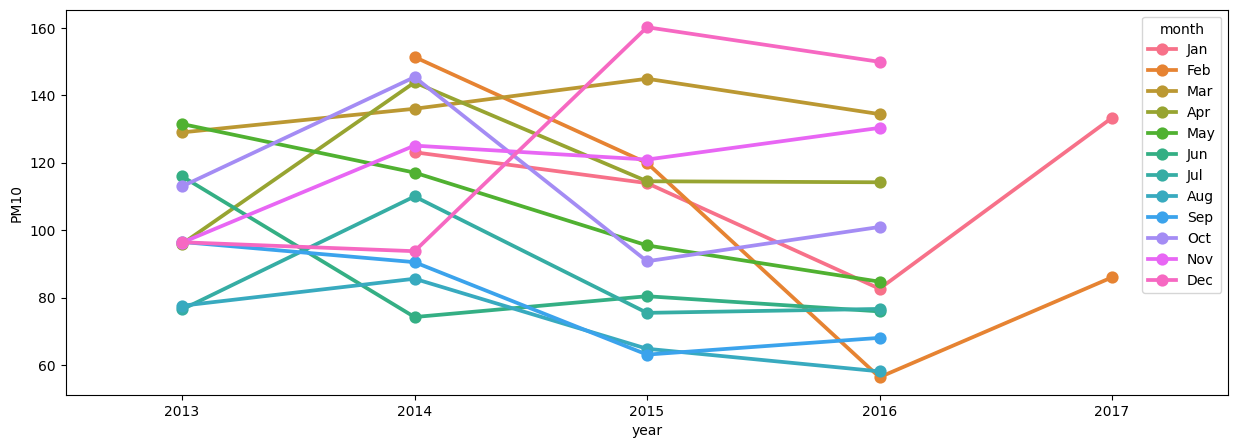

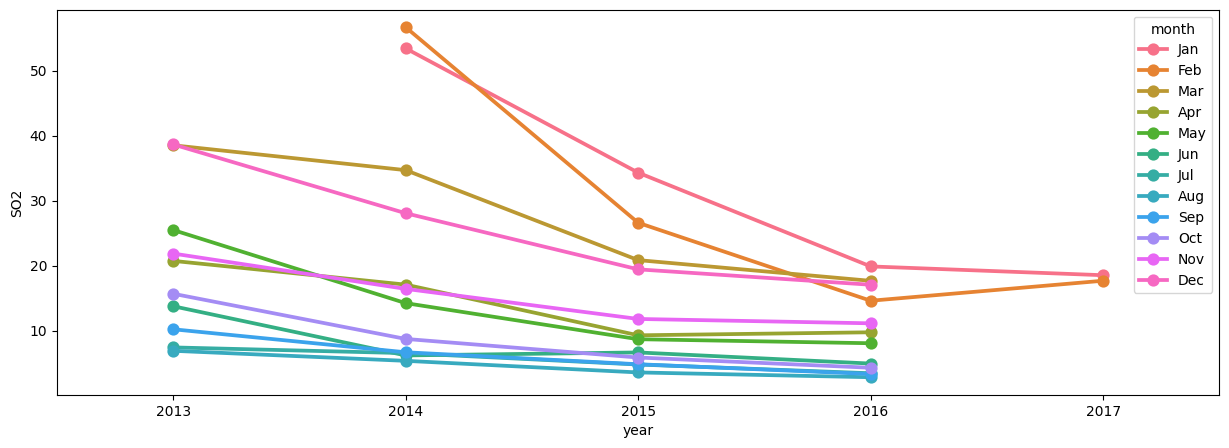

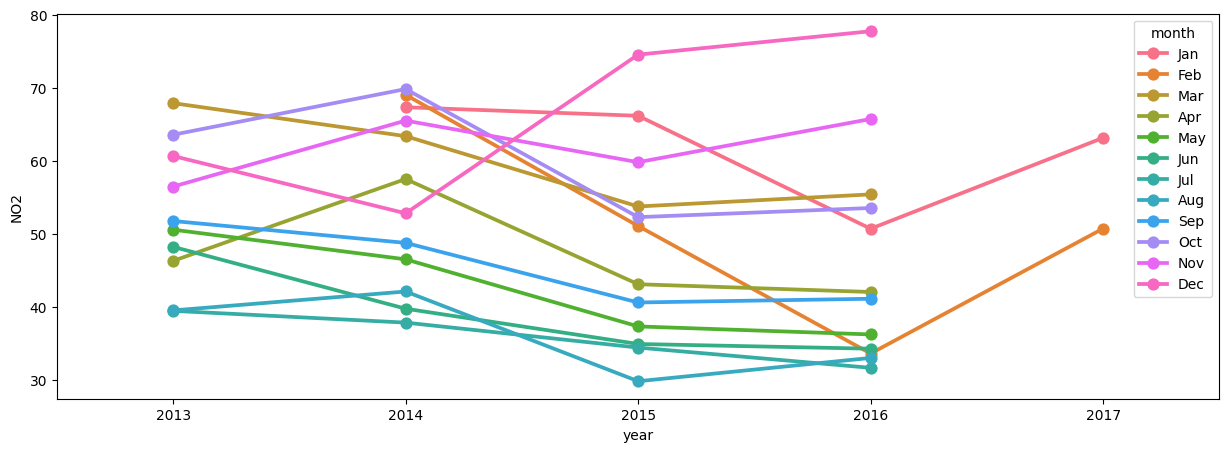

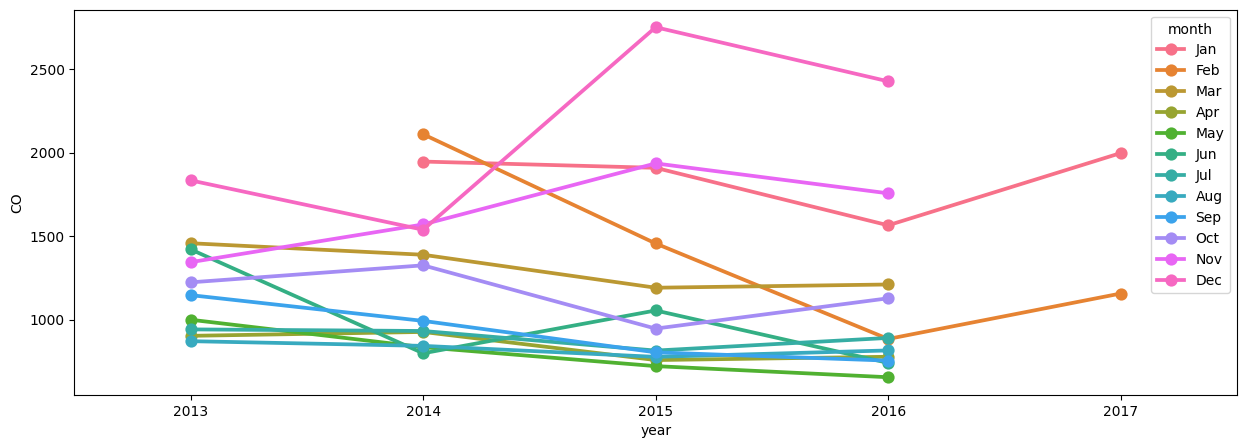

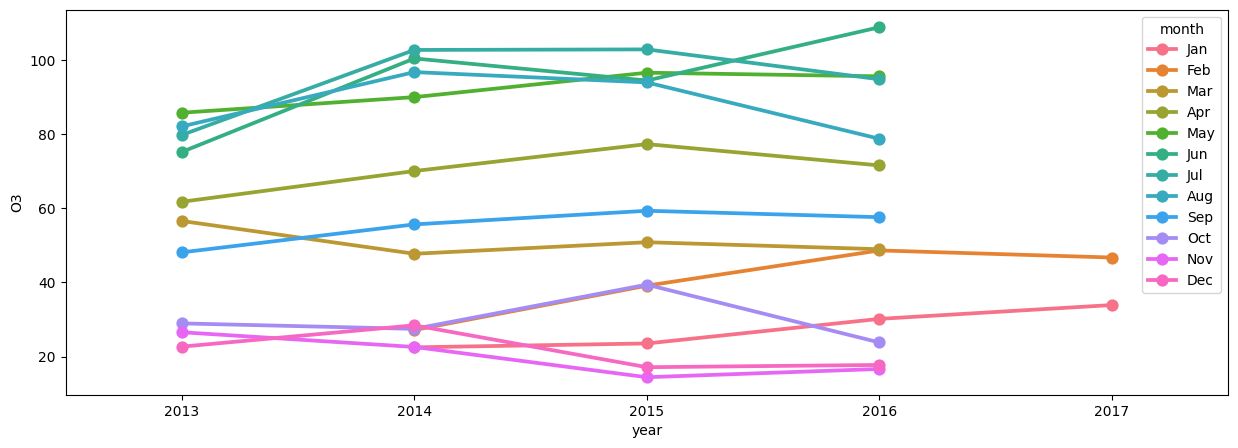

In [ ]:
for i in compounds:
    temp_data = combined_df.copy()
    temp_data.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                           'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'month', 'year',]].groupby(["year",
                                                    "month"]).mean().reset_index().sort_values(by=['year',
                                                                                                   'month'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=df, hue='month', hue_order=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                                  'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

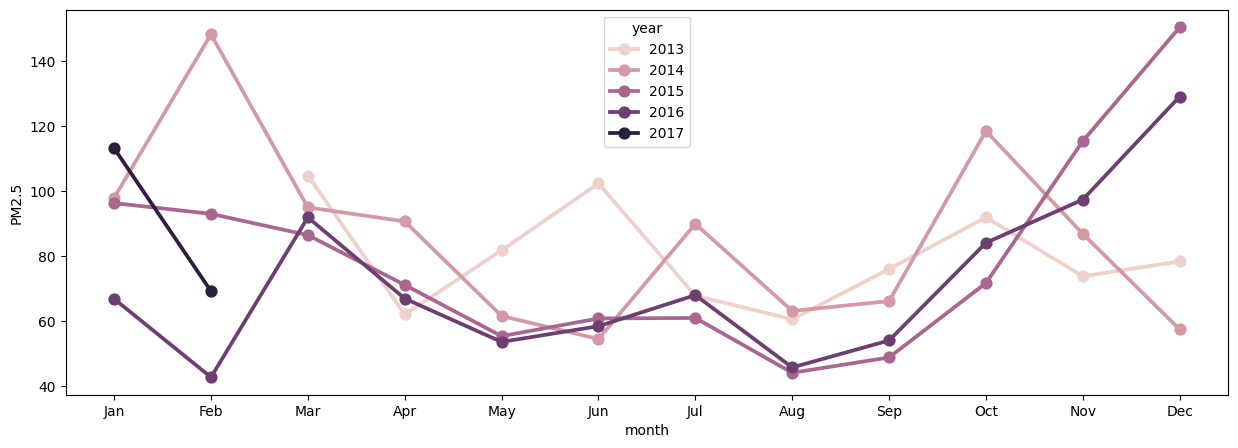

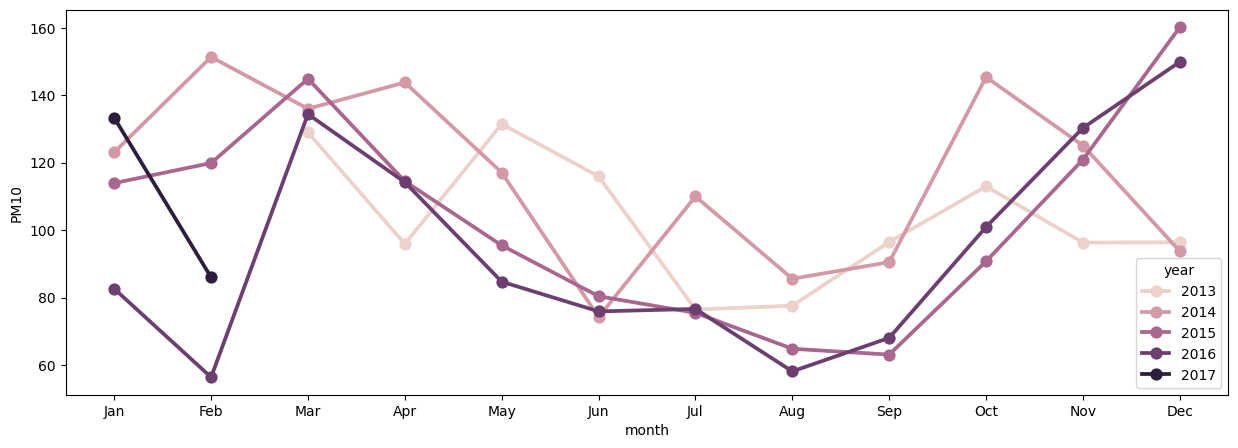

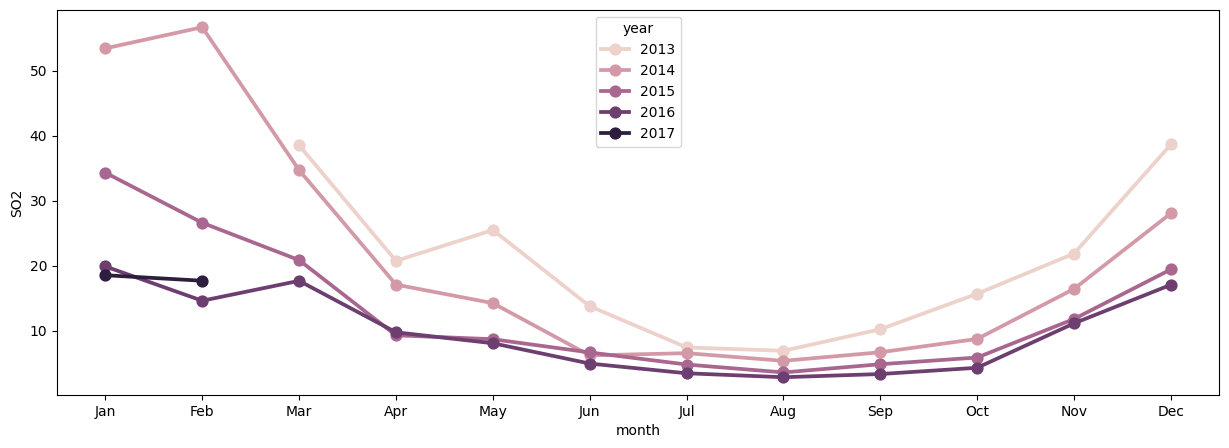

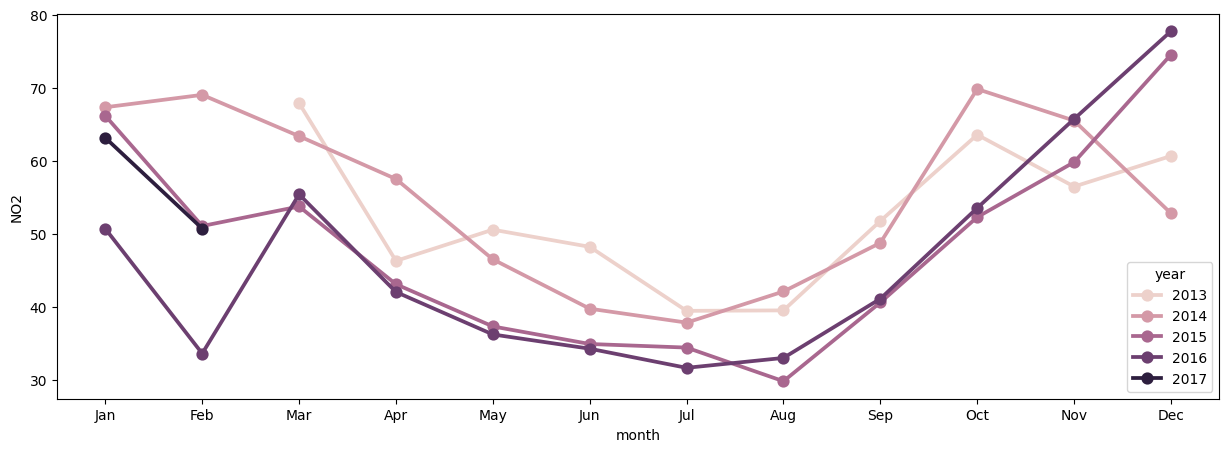

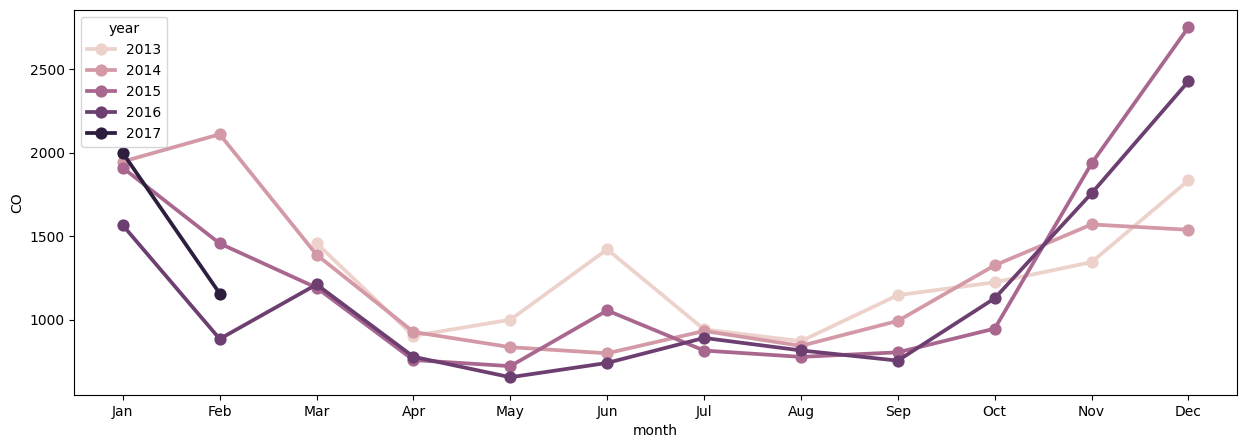

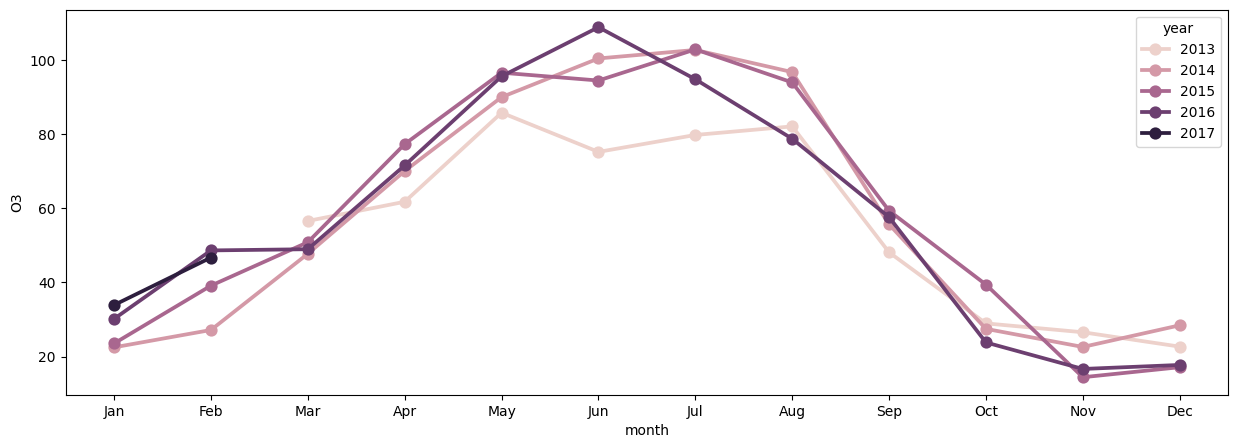

In [ ]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
for i in compounds:
    temp_data = combined_df.copy()
    temp_data.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                               'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'month', 'year']].groupby(["year",
                                                  "month"]).mean().reset_index().sort_values(by=['year',
                                                                                                 'month'], ascending=True)
    df = df.iloc[df['month'].map(custom_dict).argsort()]
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='month', y=i, data=df, hue="year")

In [ ]:
import numpy as np

# Map of cardinal directions to degrees
directions_to_degrees = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Convert wind directions to radians and calculate sine and cosine components
def direction_to_components(direction):
    if direction in directions_to_degrees:
        radians = np.deg2rad(directions_to_degrees[direction])
        return np.sin(radians), np.cos(radians)
    else:
        return np.nan, np.nan

# Apply the conversion to the 'wd' column
sin_components, cos_components = zip(*combined_df['wd'].map(direction_to_components))

# Add these components as new columns to the dataframe
combined_df['sin_dir'] = sin_components
combined_df['cos_dir'] = cos_components

# Display the first few rows to verify the addition
#combined_df[['wd', 'sin_dir', 'cos_dir']].head()
combined_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station   sin_dir   cos_dir  
0       -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin -0.382683  0.923880  
1       -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  0.000000  1.000000  
2       -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin -0.382683  0.923880  
3       -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin -0.707107  0.707107  
4       -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  0.000000  1.000000  
...      ...     ...   ...   ...  ...   ...            ...       ...       ...  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong -0.707107  0.707107  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong -0.923880  0.382683  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong -0.707107  0.707107  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong -0.382683  0.923880  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  0.382683  0.923880  

[420768 rows x 20 columns]

Remove wind direction and Station for a comined dataset which is the mean of all 12 datasets in each datetime. So, this mean combined dataframe would be the representative of all polutant and other properties in the whole city.

In [ ]:
mean_df= combined_df.drop(['station','wd'],axis=1)
mean_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN  WSPM   sin_dir   cos_dir  
0       -0.7  1023.0 -18.8   0.0   4.4 -0.382683  0.923880  
1       -1.1  1023.2 -18.2   0.0   4.7  0.000000  1.000000  
2       -1.1  1023.5 -18.2   0.0   5.6 -0.382683  0.923880  
3       -1.4  1024.5 -19.4   0.0   3.1 -0.707107  0.707107  
4       -2.0  1025.2 -19.5   0.0   2.0  0.000000  1.000000  
...      ...     ...   ...   ...   ...       ...       ...  
420763  12.5  1013.5 -16.2   0.0   2.4 -0.707107  0.707107  
420764  11.6  1013.6 -15.1   0.0   0.9 -0.923880  0.382683  
420765  10.8  1014.2 -13.3   0.0   1.1 -0.707107  0.707107  
420766  10.5  1014.4 -12.9   0.0   1.2 -0.382683  0.923880  
420767   8.6  1014.1 -15.9   0.0   1.3  0.382683  0.923880  

[420768 rows x 18 columns]

In [ ]:
# Step 2: Construct a datetime column and group by it
mean_df['datetime'] = pd.to_datetime(mean_df[['year', 'month', 'day', 'hour']])
grouped = mean_df.groupby('datetime')

# Step 3: Calculate the mean for each group, handling cyclic data separately
Beijing_df = grouped[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].mean()
Beijing_df['sin_dir'] = grouped['sin_dir'].mean()
Beijing_df['cos_dir'] = grouped['cos_dir'].mean()

# Convert mean sine and cosine values back to a wind direction angle
Beijing_df['wind_direction'] = np.arctan2(Beijing_df['sin_dir'], Beijing_df['cos_dir'])
Beijing_df['wind_direction_degrees'] = np.rad2deg(Beijing_df['wind_direction'])


Beijing_df

PM2.5       PM10       SO2        NO2          CO  \
datetime                                                                     
2013-03-01 00:00:00   5.666667   7.916667  5.666667  12.600000  308.333333   
2013-03-01 01:00:00   6.833333   9.833333  5.333333  13.111111  308.333333   
2013-03-01 02:00:00   5.666667   7.250000  8.166667  12.900000  300.000000   
2013-03-01 03:00:00   6.000000   9.250000  5.833333  12.400000  283.333333   
2013-03-01 04:00:00   4.833333   6.916667  6.750000  14.000000  308.333333   
...                        ...        ...       ...        ...         ...   
2017-02-28 19:00:00  16.083333  38.416667  3.583333  28.818182  408.333333   
2017-02-28 20:00:00  19.000000  38.166667  5.083333  41.666667  533.333333   
2017-02-28 21:00:00  15.666667  33.083333  5.000000  40.833333  558.333333   
2017-02-28 22:00:00  13.666667  29.666667  5.500000  40.166667  591.666667   
2017-02-28 23:00:00  15.000000  31.833333  6.500000  50.416667  658.333333   

                            O3       TEMP         PRES       DEWP  RAIN  \
datetime                                                                  
2013-03-01 00:00:00  75.416667  -0.916667  1022.766667 -19.900000   0.0   
2013-03-01 01:00:00  75.750000  -1.216667  1023.191667 -19.916667   0.0   
2013-03-01 02:00:00  66.000000  -1.591667  1023.325000 -21.008333   0.0   
2013-03-01 03:00:00  75.333333  -1.891667  1024.208333 -21.833333   0.0   
2013-03-01 04:00:00  66.333333  -2.283333  1024.866667 -21.625000   0.0   
...                        ...        ...          ...        ...   ...   
2017-02-28 19:00:00  71.900000  12.000000  1011.950000 -15.133333   0.0   
2017-02-28 20:00:00  56.545455  10.933333  1012.141667 -14.191667   0.0   
2017-02-28 21:00:00  54.000000  10.041667  1012.625000 -13.558333   0.0   
2017-02-28 22:00:00  53.250000   9.225000  1012.841667 -13.166667   0.0   
2017-02-28 23:00:00  41.000000   7.741667  1012.558333 -14.158333   0.0   

                         WSPM   sin_dir   cos_dir  wind_direction  \
datetime                                                            
2013-03-01 00:00:00  4.175000 -0.296506  0.643571       -0.431733   
2013-03-01 01:00:00  3.875000 -0.249528  0.717289       -0.334782   
2013-03-01 02:00:00  4.400000 -0.309193  0.707352       -0.412086   
2013-03-01 03:00:00  3.366667 -0.346071  0.775598       -0.419688   
2013-03-01 04:00:00  2.716667 -0.340467  0.847333       -0.382066   
...                       ...       ...       ...             ...   
2017-02-28 19:00:00  2.141667 -0.481986  0.699747       -0.603170   
2017-02-28 20:00:00  1.275000 -0.688671  0.366979       -1.081192   
2017-02-28 21:00:00  1.350000 -0.235702  0.686887       -0.330556   
2017-02-28 22:00:00  1.466667 -0.218377  0.779487       -0.273152   
2017-02-28 23:00:00  1.391667  0.341083  0.906781        0.359776   

                     wind_direction_degrees  
datetime                                     
2013-03-01 00:00:00              -24.736459  
2013-03-01 01:00:00              -19.181605  
2013-03-01 02:00:00              -23.610769  
2013-03-01 03:00:00              -24.046378  
2013-03-01 04:00:00              -21.890749  
...                                     ...  
2017-02-28 19:00:00              -34.559112  
2017-02-28 20:00:00              -61.947727  
2017-02-28 21:00:00              -18.939440  
2017-02-28 22:00:00              -15.650469  
2017-02-28 23:00:00               20.613652  

[35064 rows x 15 columns]

In [ ]:
Beijing_df.describe()

PM2.5          PM10           SO2           NO2            CO  \
count  34983.000000  34981.000000  34977.000000  34977.000000  34860.000000   
mean      79.713900    104.700644     15.837488     50.585613   1231.518482   
std       76.149408     84.670674     19.660999     29.302478   1054.535149   
min        3.250000      4.083333      1.202333      4.166667    125.000000   
25%       22.750000     40.750000      3.583333     27.916667    545.454545   
50%       57.583333     86.083333      8.000000     45.500000    900.000000   
75%      109.166667    141.333333     19.916667     67.500000   1527.272727   
max      692.000000    941.000000    248.666667    192.916667   8871.428571   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34957.000000  35046.000000  35046.000000  35046.000000  35046.000000   
mean      57.072742     13.534228   1010.750801      2.484245      0.064451   
std       53.570635     11.397491     10.212550     13.727402      0.603018   
min        1.000000    -16.625000    985.408333    -34.866667      0.000000   
25%       15.181818      3.141667   1002.241667     -8.925000      0.000000   
50%       43.666667     14.512500   1010.525000      2.975000      0.000000   
75%       78.833333     23.241667   1019.083333     15.150000      0.000000   
max      346.000000     40.425000   1040.158333     27.900000     25.008333   

               WSPM       sin_dir       cos_dir  wind_direction  \
count  35052.000000  35052.000000  35052.000000    35052.000000   
mean       1.730019      0.061425      0.116161        0.040010   
std        1.048181      0.451437      0.528847        1.677170   
min        0.066667     -0.993657     -0.990485       -3.141174   
25%        1.000000     -0.320137     -0.335489       -1.107276   
50%        1.425000      0.122706      0.218377        0.321751   
75%        2.158333      0.430543      0.580285        1.178097   
max        8.666667      0.980970      0.987313        3.141593   

       wind_direction_degrees  
count            35052.000000  
mean                 2.292416  
std                 96.094743  
min               -179.976024  
25%                -63.442253  
50%                 18.434949  
75%                 67.500000  
max                180.000000

Handling the missing Values

In [ ]:
Beijing_df.isnull().sum()

PM2.5                      81
PM10                       83
SO2                        87
NO2                        87
CO                        204
O3                        107
TEMP                       18
PRES                       18
DEWP                       18
RAIN                       18
WSPM                       12
sin_dir                    12
cos_dir                    12
wind_direction             12
wind_direction_degrees     12
dtype: int64

In [ ]:
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Apply linear interpolation for each feature
for feature in features:
    Beijing_df[feature].interpolate(method='linear', inplace=True)

Add AQHI for Beijing based on formula in: https://en.wikipedia.org/wiki/Air_Quality_Health_Index_%28Canada%29#:~:text=The%20national%20AQHI%20is%20based%20on%20three%2Dhour%20average%20concentrations,billion%20%28ppb%29%20while%20PM2"

In [ ]:
from math import exp

# Define the function to calculate AQHI
def calculate_aqhi(row):
    o3 = row['O3']
    no2 = row['NO2']
    pm2_5 = row['PM2.5']
    # Check for NaN values and return NaN to avoid calculation errors
    if pd.isna(o3) or pd.isna(no2) or pd.isna(pm2_5):
        return float('nan')
    # Implementing the formula provided
    aqhi = (10 / 18) * 100 * ((exp(0.000871 * no2) - 1) +
                                 (exp(0.000537 * o3) - 1) +
                                 (exp(0.000487 * pm2_5) - 1))
    return aqhi

# Apply the function to calculate AQHI for each row
Beijing_df['AQHI'] = Beijing_df.apply(calculate_aqhi, axis=1)

# Display the first few rows to verify the new AQHI column
print(Beijing_df[['O3', 'NO2', 'PM2.5', 'AQHI']].head())

                            O3        NO2     PM2.5      AQHI
datetime                                                     
2013-03-01 00:00:00  75.416667  12.600000  5.666667  3.062696
2013-03-01 01:00:00  75.750000  13.111111  6.833333  3.129724
2013-03-01 02:00:00  66.000000  12.900000  5.666667  2.785572
2013-03-01 03:00:00  75.333333  12.400000  6.000000  3.059368
2013-03-01 04:00:00  66.333333  14.000000  4.833333  2.827127


In [ ]:
Beijing_df.describe()

PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      79.833712    104.837218     15.877038     50.627291   1232.687778   
std       76.412754     84.982043     19.743046     29.360311   1057.094953   
min        3.250000      4.083333      1.202333      4.166667    125.000000   
25%       22.767045     40.833333      3.583333     27.916667    550.000000   
50%       57.618182     86.083333      8.000000     45.500000    900.000000   
75%      109.250000    141.465909     19.916667     67.500000   1527.272727   
max      692.000000    941.000000    248.666667    192.916667   8871.428571   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      57.018931     13.531790   1010.754192      2.482738      0.064418   
std       53.542654     11.398510     10.212344     13.728385      0.602865   
min        1.000000    -16.625000    985.408333    -34.866667      0.000000   
25%       15.166667      3.133333   1002.241667     -8.941667      0.000000   
50%       43.583333     14.508333   1010.525000      2.966667      0.000000   
75%       78.750000     23.241667   1019.083333     15.158333      0.000000   
max      346.000000     40.425000   1040.158333     27.900000     25.008333   

               WSPM       sin_dir       cos_dir  wind_direction  \
count  35064.000000  35052.000000  35052.000000    35052.000000   
mean       1.730080      0.061425      0.116161        0.040010   
std        1.048092      0.451437      0.528847        1.677170   
min        0.066667     -0.993657     -0.990485       -3.141174   
25%        1.000000     -0.320137     -0.335489       -1.107276   
50%        1.425000      0.122706      0.218377        0.321751   
75%        2.158333      0.430543      0.580285        1.178097   
max        8.666667      0.980970      0.987313        3.141593   

       wind_direction_degrees          AQHI  
count            35052.000000  35064.000000  
mean                 2.292416      6.518592  
std                 96.094743      3.386736  
min               -179.976024      1.487070  
25%                -63.442253      3.920780  
50%                 18.434949      5.748682  
75%                 67.500000      8.242647  
max                180.000000     26.912292

In [ ]:
Beijing_df

PM2.5       PM10       SO2        NO2          CO  \
datetime                                                                     
2013-03-01 00:00:00   5.666667   7.916667  5.666667  12.600000  308.333333   
2013-03-01 01:00:00   6.833333   9.833333  5.333333  13.111111  308.333333   
2013-03-01 02:00:00   5.666667   7.250000  8.166667  12.900000  300.000000   
2013-03-01 03:00:00   6.000000   9.250000  5.833333  12.400000  283.333333   
2013-03-01 04:00:00   4.833333   6.916667  6.750000  14.000000  308.333333   
...                        ...        ...       ...        ...         ...   
2017-02-28 19:00:00  16.083333  38.416667  3.583333  28.818182  408.333333   
2017-02-28 20:00:00  19.000000  38.166667  5.083333  41.666667  533.333333   
2017-02-28 21:00:00  15.666667  33.083333  5.000000  40.833333  558.333333   
2017-02-28 22:00:00  13.666667  29.666667  5.500000  40.166667  591.666667   
2017-02-28 23:00:00  15.000000  31.833333  6.500000  50.416667  658.333333   

                            O3       TEMP         PRES       DEWP  RAIN  \
datetime                                                                  
2013-03-01 00:00:00  75.416667  -0.916667  1022.766667 -19.900000   0.0   
2013-03-01 01:00:00  75.750000  -1.216667  1023.191667 -19.916667   0.0   
2013-03-01 02:00:00  66.000000  -1.591667  1023.325000 -21.008333   0.0   
2013-03-01 03:00:00  75.333333  -1.891667  1024.208333 -21.833333   0.0   
2013-03-01 04:00:00  66.333333  -2.283333  1024.866667 -21.625000   0.0   
...                        ...        ...          ...        ...   ...   
2017-02-28 19:00:00  71.900000  12.000000  1011.950000 -15.133333   0.0   
2017-02-28 20:00:00  56.545455  10.933333  1012.141667 -14.191667   0.0   
2017-02-28 21:00:00  54.000000  10.041667  1012.625000 -13.558333   0.0   
2017-02-28 22:00:00  53.250000   9.225000  1012.841667 -13.166667   0.0   
2017-02-28 23:00:00  41.000000   7.741667  1012.558333 -14.158333   0.0   

                         WSPM   sin_dir   cos_dir  wind_direction  \
datetime                                                            
2013-03-01 00:00:00  4.175000 -0.296506  0.643571       -0.431733   
2013-03-01 01:00:00  3.875000 -0.249528  0.717289       -0.334782   
2013-03-01 02:00:00  4.400000 -0.309193  0.707352       -0.412086   
2013-03-01 03:00:00  3.366667 -0.346071  0.775598       -0.419688   
2013-03-01 04:00:00  2.716667 -0.340467  0.847333       -0.382066   
...                       ...       ...       ...             ...   
2017-02-28 19:00:00  2.141667 -0.481986  0.699747       -0.603170   
2017-02-28 20:00:00  1.275000 -0.688671  0.366979       -1.081192   
2017-02-28 21:00:00  1.350000 -0.235702  0.686887       -0.330556   
2017-02-28 22:00:00  1.466667 -0.218377  0.779487       -0.273152   
2017-02-28 23:00:00  1.391667  0.341083  0.906781        0.359776   

                     wind_direction_degrees      AQHI  
datetime                                               
2013-03-01 00:00:00              -24.736459  3.062696  
2013-03-01 01:00:00              -19.181605  3.129724  
2013-03-01 02:00:00              -23.610769  2.785572  
2013-03-01 03:00:00              -24.046378  3.059368  
2013-03-01 04:00:00              -21.890749  2.827127  
...                                     ...       ...  
2017-02-28 19:00:00              -34.559112  4.035945  
2017-02-28 20:00:00              -61.947727  4.282490  
2017-02-28 21:00:00              -18.939440  4.071514  
2017-02-28 22:00:00              -15.650469  3.960568  
2017-02-28 23:00:00               20.613652  4.138015  

[35064 rows x 16 columns]

Correlation Matrix

Multi-Collinearity Feature:: PM10 &  PM2.5 :-> Correlation Score 0.9034
Multi-Collinearity Feature:: PM10 &  NO2 :-> Correlation Score 0.7079
Multi-Collinearity Feature:: PM10 &  CO :-> Correlation Score 0.7311
Multi-Collinearity Feature:: PM10 &  AQHI :-> Correlation Score 0.8598
Multi-Collinearity Feature:: SO2 &  PM2.5 :-> Correlation Score 0.5166
Multi-Collinearity Feature:: SO2 &  NO2 :-> Correlation Score 0.5705
Multi-Collinearity Feature:: SO2 &  CO :-> Correlation Score 0.5768
Multi-Collinearity Feature:: SO2 &  AQHI :-> Correlation Score 0.5005
Multi-Collinearity Feature:: NO2 &  PM2.5 :-> Correlation Score 0.7432
Multi-Collinearity Feature:: NO2 &  PM10 :-> Correlation Score 0.7079
Multi-Collinearity Feature:: NO2 &  SO2 :-> Correlation Score 0.5705
Multi-Collinearity Feature:: NO2 &  CO :-> Correlation Score 0.7803
Multi-Collinearity Feature:: NO2 &  AQHI :-> Correlation Score 0.688
Multi-Collinearity Feature:: CO &  PM2.5 :-> Correlation Score 0.826
Multi-Collinearity Featu

<Axes: >

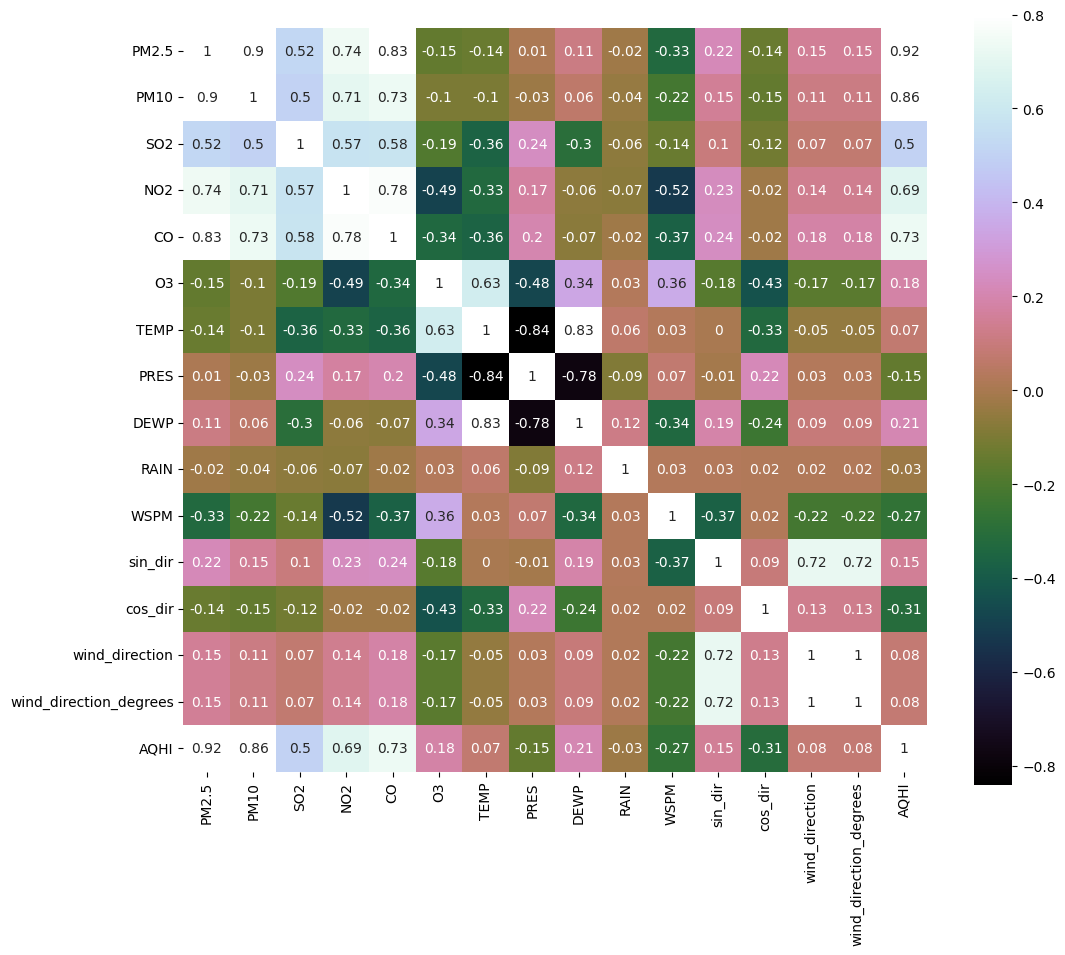

In [ ]:
# Correlation matrix
import seaborn as sns

corrmat = Beijing_df.select_dtypes(exclude='object').corr()
f, ax = plt.subplots(figsize=(12, 10))

dupl_key_values = list()
for i in range(len(corrmat.columns)):
  for j in range(len(corrmat.index)):
    if corrmat.iloc[i,j]>0.50 and corrmat.iloc[i,j] != 1.0:
        if i not in dupl_key_values or j in dupl_key_values:
            dupl_key_values.append(j)
        if i in dupl_key_values or j not in dupl_key_values:
            dupl_key_values.append(i)
            print('Multi-Collinearity Feature:: {} &  {} :-> Correlation Score {}'.format(corrmat.columns[i],corrmat.columns[j],round(corrmat.iloc[i,j],4)))

sns.heatmap(round(corrmat, 2), vmax=.8, square=True, annot=True,cmap='cubehelix')

As it is obvious PM2.5, PM10, NO2, and CO has the highest affect on AQHI

Do we need outlier detection?

Skewness of the Target Variable:  1.8502


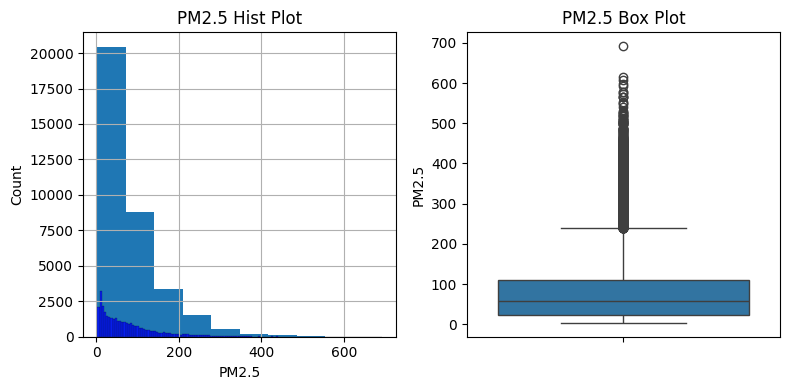

In [ ]:
print("Skewness of the Target Variable: ", round(Beijing_df['PM2.5'].skew(),4))
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (8,4))
# plot a distplot for the residuals
Beijing_df['PM2.5'].hist(ax = axes[0])
sns.histplot(Beijing_df['PM2.5'], ax = axes[0], color='b')
axes[0].set_title('PM2.5 Hist Plot', fontsize = 12)

# plot the Q-Q plot
sns.boxplot(Beijing_df['PM2.5'], ax = axes[1],orient="v")
axes[1].set_title('PM2.5 Box Plot', fontsize = 12)
fig.tight_layout()
# display the plot
plt.show()

Skewness of AQHI: 1.3801
Skewness of CO: 2.3718
Skewness of NO2: 0.9517
Skewness of PM10: 1.782
Skewness of O3: 1.5217
Skewness of PM2.5: 1.8502


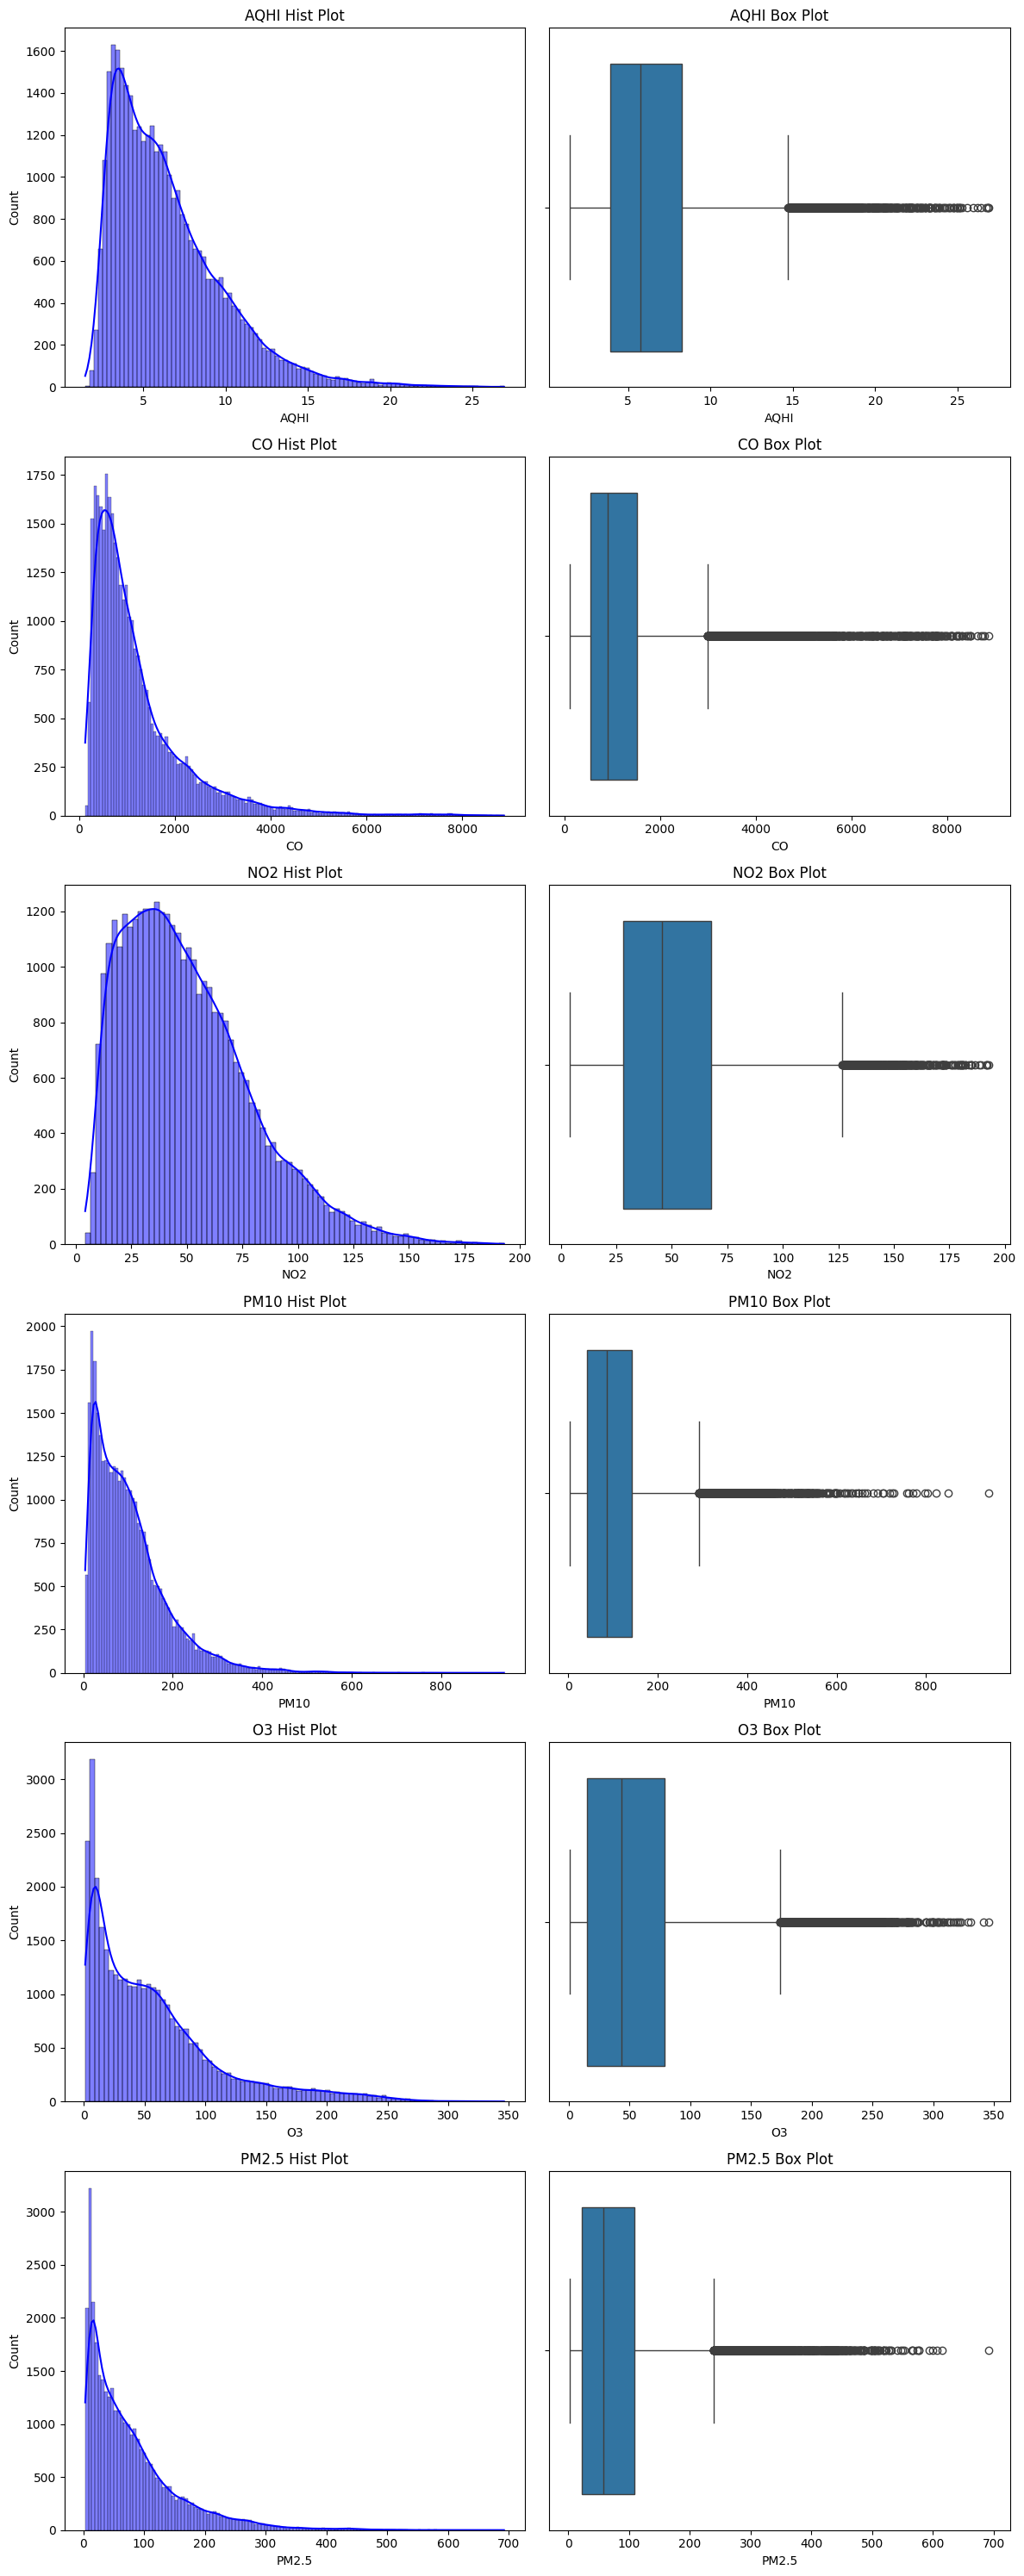

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the pollutants to examine
pollutants = ['AQHI', 'CO', 'NO2', 'PM10', 'O3','PM2.5']

# Set up the figure to hold multiple subplots
fig, axes = plt.subplots(nrows=len(pollutants), ncols=2, figsize=(12, 5 * len(pollutants)))

# Loop through the pollutants and create a histogram and box plot for each
for i, pollutant in enumerate(pollutants):
    # Calculate and print the skewness for each pollutant
    skewness = Beijing_df[pollutant].skew()
    print(f"Skewness of {pollutant}: {round(skewness, 4)}")

    # Histogram plot for the current pollutant
    sns.histplot(Beijing_df[pollutant], ax=axes[i, 0], color='b', kde=True)  # kde=True adds a density curve
    axes[i, 0].set_title(f'{pollutant} Hist Plot', fontsize=12)

    # Box plot for the current pollutant
    sns.boxplot(x=Beijing_df[pollutant], ax=axes[i, 1])
    axes[i, 1].set_title(f'{pollutant} Box Plot', fontsize=12)

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

The skewness of the targer variable is 1.38 (AQHI which is impacted by other pollutatnts such as CO, PM2.5, etc) In a positively skewed distribution, outliers are more likely to be found on the right-hand side of the distribution (the higher values).
skewness of 1.38 for the target variable suggests that data need to pay \ attention to how outliers are treated and consider normalizing the data before conducting further analysis or modeling.

*Outlier* Detection

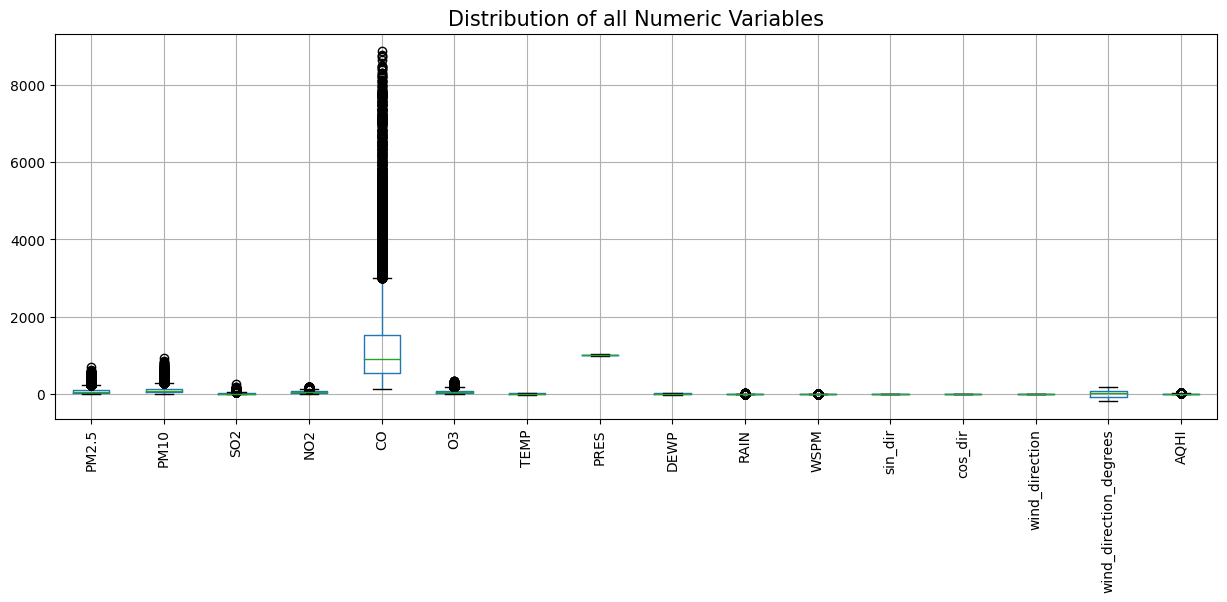

In [ ]:
Beijing_df_outlier = Beijing_df.copy()
Beijing_df_outlier = Beijing_df_outlier.select_dtypes(exclude='object')
# set the plot size using figure()
plt.figure(figsize = (15,5))

# plot a boxplot to visualize the outliers in all the numeric variables
Beijing_df_outlier.boxplot()

plt.title('Distribution of all Numeric Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 10)

# display the plot
plt.show()

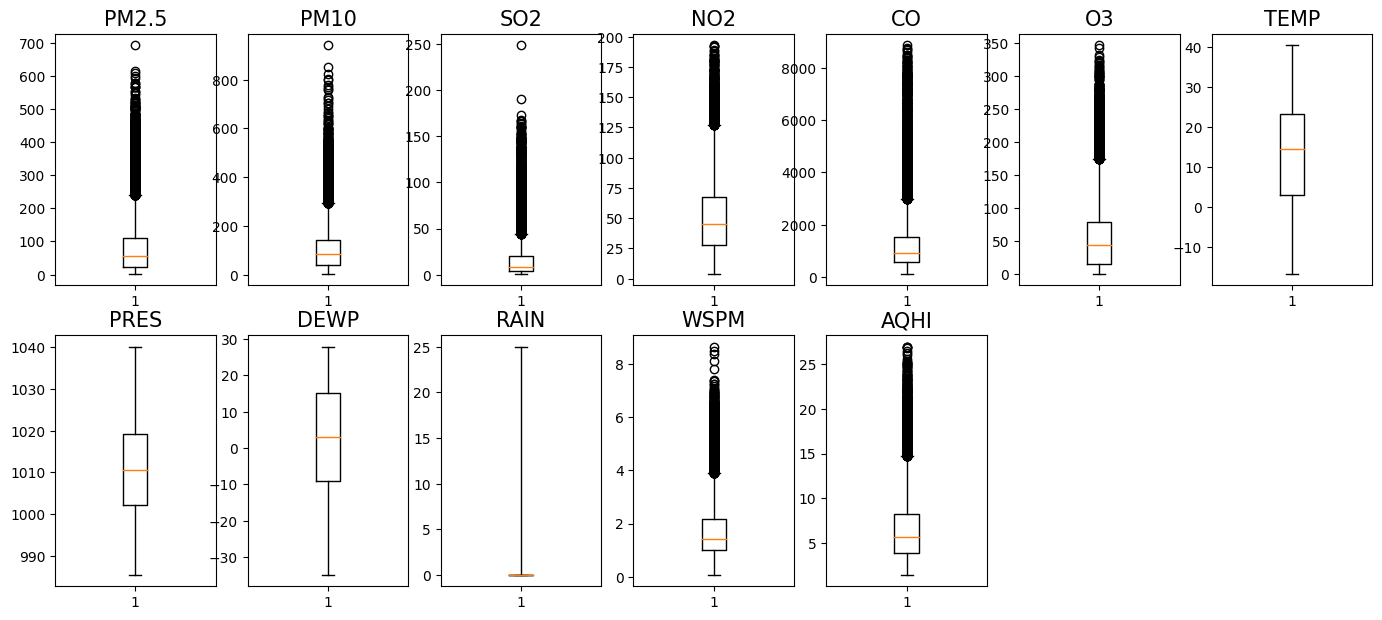

In [ ]:
# Exclude wind associated features
columns_to_exclude = ['sin_dir', 'cos_dir', 'wind_direction', 'wind_direction_degrees']
Beijing_df_outlier = Beijing_df[[col for col in Beijing_df.columns if col not in columns_to_exclude]].copy()


plt.rcParams['figure.dpi'] = 100
outliers_by_variables = Beijing_df_outlier.columns

plt.figure(figsize=(17,15))
for i in range(0,outliers_by_variables.shape[0]):
    plt.subplot(4,7, i+1)
    plt.boxplot(Beijing_df_outlier[outliers_by_variables[i]], autorange=True)
    plt.title(outliers_by_variables[i], fontdict= {'fontsize': 15 ,'fontweight': 5, 'color':'000000'})
    plt.AutoLocator.default_params

Outlier Treatment:
Using the Interquartile Range (IQR) to treat outliers is a common approach and works well with skewed data. The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of your data. Outliers are often defined as observations that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

It should be noted that the "Rain" feature is excluded from the outlier section, due to the fact that lots of the days they would be no raining in Beijing and using the IQR method the rainy days would be recognized outliers.

In [ ]:
print('Before: Outliers Treating with IQR', Beijing_df.shape)

# Creating a copy of the DataFrame to work with
Beijing_df_IQR = Beijing_df.copy()

# Selecting only numeric data types for outlier detection
numeric_columns = Beijing_df_IQR.select_dtypes(include=['float64', 'int64']).columns

# Replace outliers in each column
for col in numeric_columns:
    if col != 'RAIN':  # Skip 'RAIN' column for outlier replacement
        # Calculate Q1, Q3 and IQR
        Q1 = Beijing_df_IQR[col].quantile(0.25)
        Q3 = Beijing_df_IQR[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Define a mask for outliers
        outlier_mask = (Beijing_df_IQR[col] < lower_bound) | (Beijing_df_IQR[col] > upper_bound)

        # Replace outliers with NaN to ease the calculation of neighbors' mean
        Beijing_df_IQR.loc[outlier_mask, col] = np.nan

        # Interpolate missing values using mean of neighboring values
        Beijing_df_IQR[col] = Beijing_df_IQR[col].interpolate(method='linear', limit_direction='both')

print('After: Outliers Replaced with Neighbors Mean', Beijing_df_IQR.shape)


Before: Outliers Treating with IQR (35064, 16)
After: Outliers Replaced with Neighbors Mean (35064, 16)


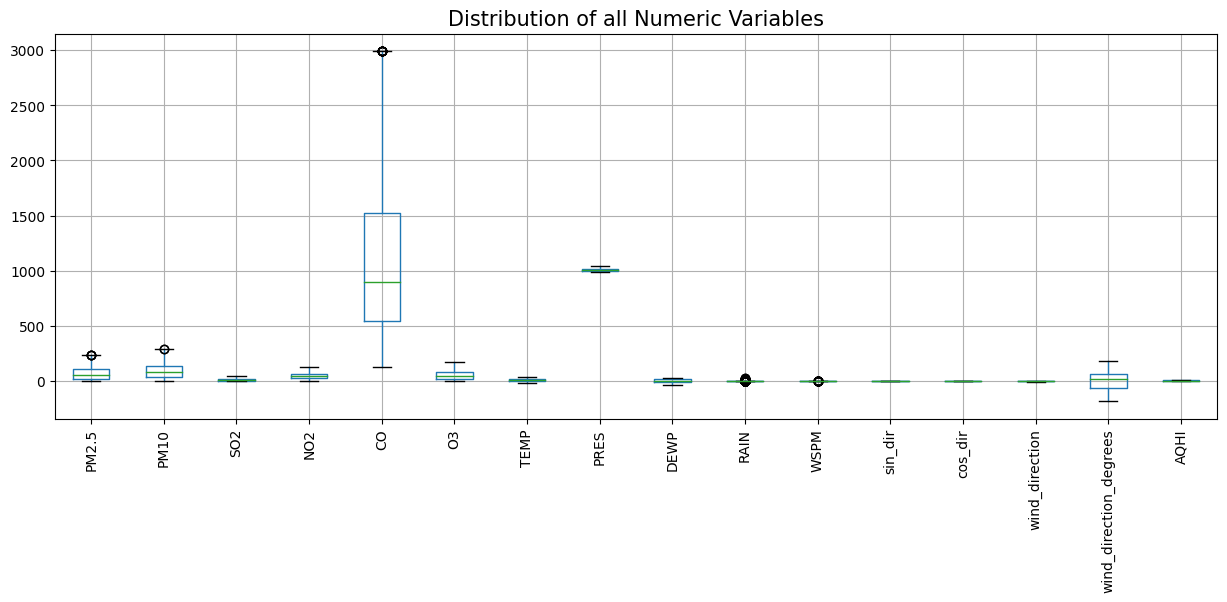

In [ ]:
plt.figure(figsize = (15,5))

# plot a boxplot to visualize the outliers in all the numeric variables
Beijing_df_IQR.boxplot()

# set plot label
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
plt.xticks(rotation = 'vertical', fontsize = 10)

# display the plot
plt.show()

For outlier detection, I have to replace the outlier with an interpolation.

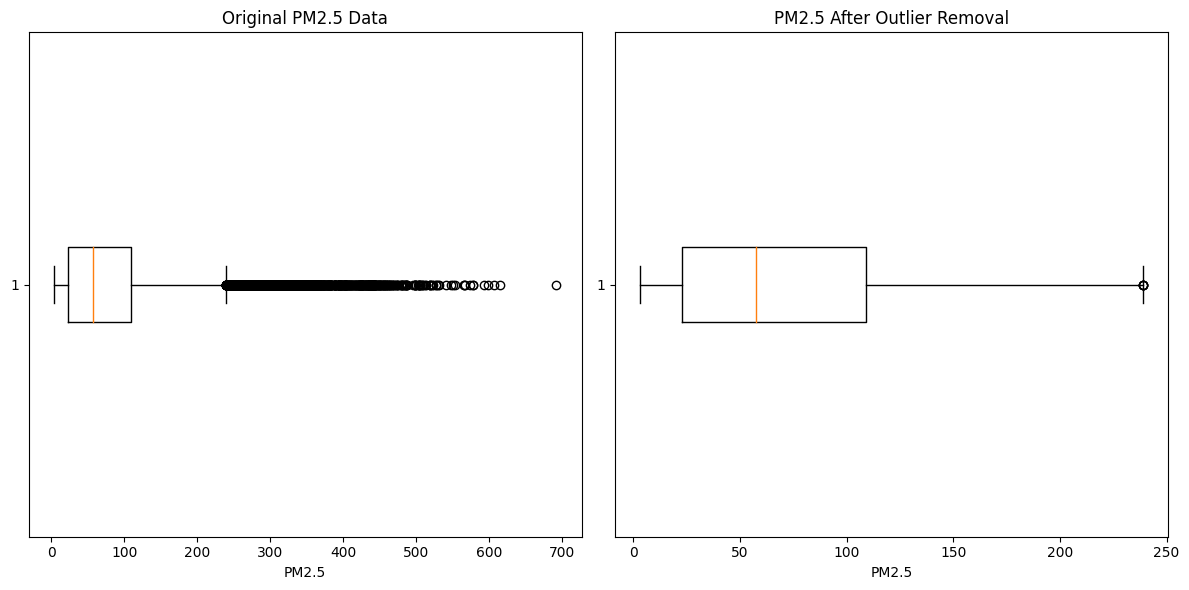

In [ ]:
# Selecting the 'PM2.5' column from both DataFrames for comparison
original_pm25 = Beijing_df['PM2.5']
cleaned_pm25 = Beijing_df_IQR['PM2.5']

# Creating the plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for the original data
axs[0].boxplot(original_pm25.dropna(), vert=False)  # dropna() to ignore NaN values for plotting
axs[0].set_title('Original PM2.5 Data')
axs[0].set_xlabel('PM2.5')

# Box plot for the data after outlier removal
axs[1].boxplot(cleaned_pm25.dropna(), vert=False)  # dropna() to ignore NaN values for plotting
axs[1].set_title('PM2.5 After Outlier Removal')
axs[1].set_xlabel('PM2.5')

plt.tight_layout()
plt.show()


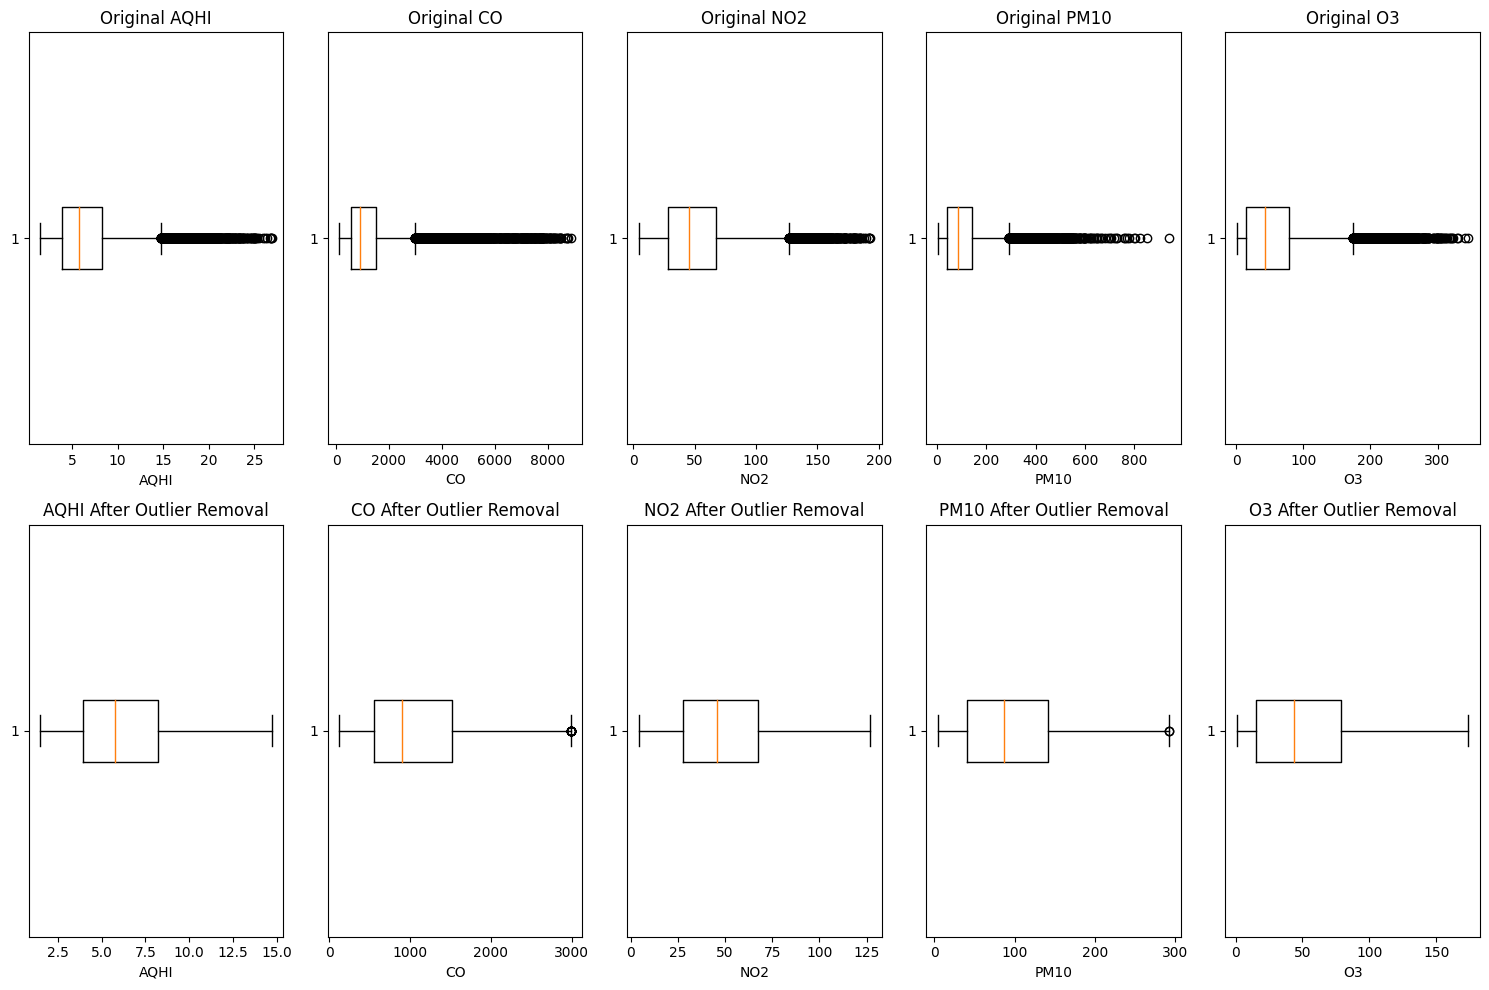

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Beijing_df' is your original DataFrame and 'Beijing_df_IQR' is after outlier treatment
# Define the pollutants to compare
pollutants = ['AQHI', 'CO', 'NO2', 'PM10', 'O3']

# Increase the size of the plot for better readability
plt.figure(figsize=(15, 10))

# Loop over each pollutant and create two subplots: one before and one after outlier treatment
for i, pollutant in enumerate(pollutants, 1):
    # Select the data for the current pollutant
    original_data = Beijing_df[pollutant]
    cleaned_data = Beijing_df_IQR[pollutant]

    # Create box plot for the original data
    plt.subplot(2, len(pollutants), i)
    plt.boxplot(original_data.dropna(), vert=False)  # dropna() to ignore NaN values for plotting
    plt.title(f'Original {pollutant}')
    plt.xlabel(pollutant)

    # Create box plot for the data after outlier removal
    plt.subplot(2, len(pollutants), i + len(pollutants))
    plt.boxplot(cleaned_data.dropna(), vert=False)  # dropna() to ignore NaN values for plotting
    plt.title(f'{pollutant} After Outlier Removal')
    plt.xlabel(pollutant)

# Adjust the layout to ensure everything fits without overlapping
plt.tight_layout()
plt.show()

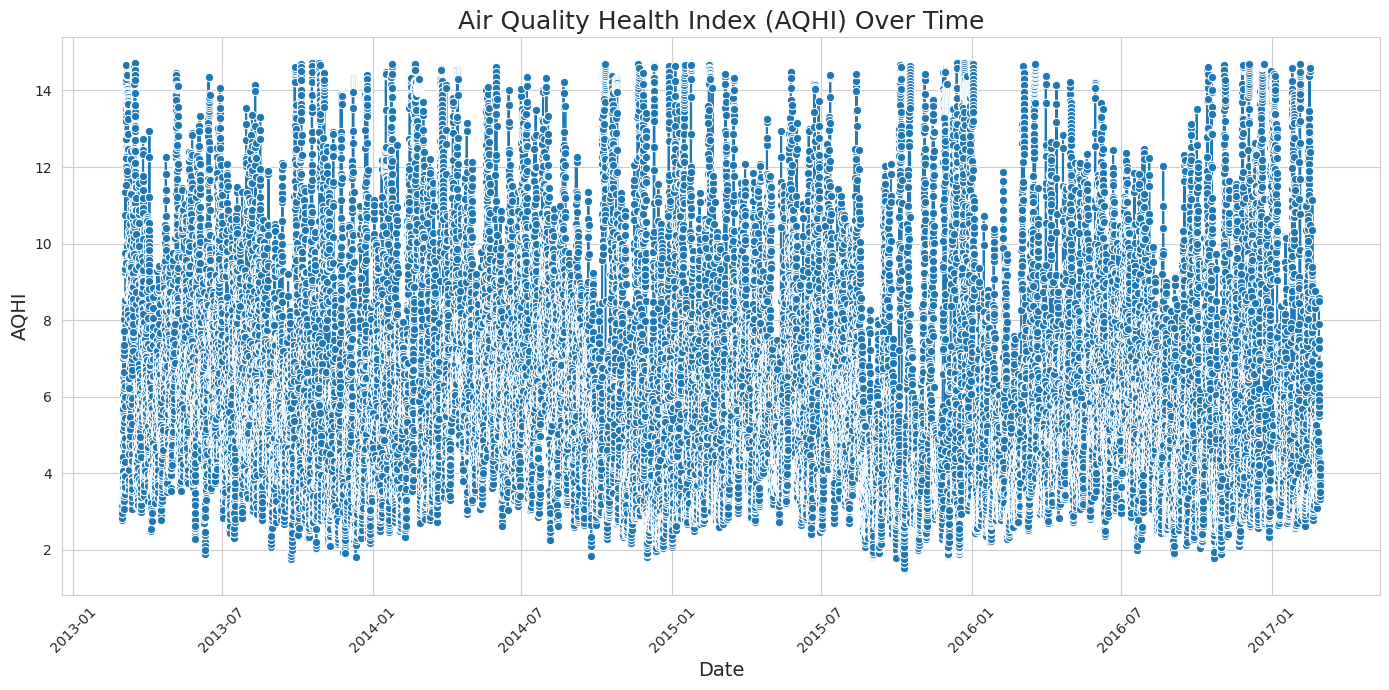

In [ ]:
sns.set_style("whitegrid")

# Increase the size of the plot for better readability
plt.figure(figsize=(14, 7))

# Create the line plot with markers for each data point
sns.lineplot(data=Beijing_df_IQR, x=Beijing_df_IQR.index, y='AQHI', marker="o")

# Set the title of the plot and labels of axes
plt.title('Air Quality Health Index (AQHI) Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQHI', fontsize=14)

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot with a tight layout to ensure everything fits without overlapping
plt.tight_layout()
plt.show()

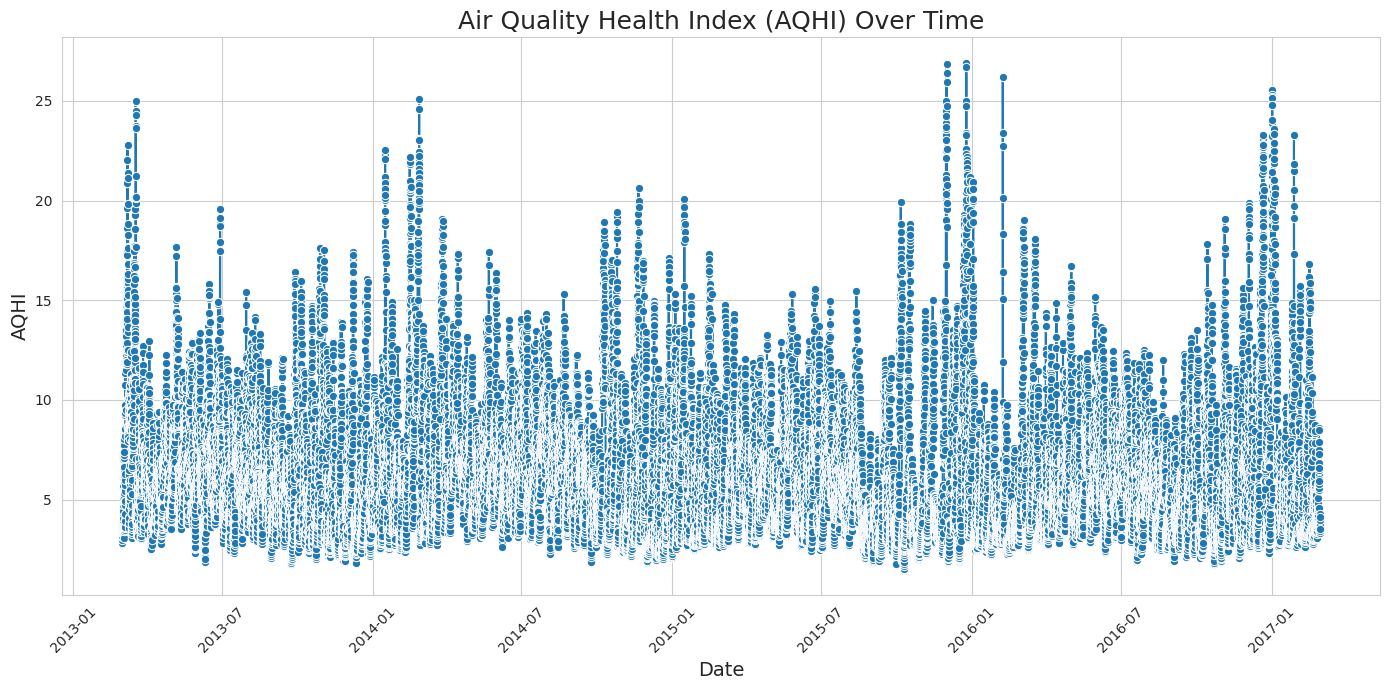

In [ ]:
sns.set_style("whitegrid")

# Increase the size of the plot for better readability
plt.figure(figsize=(14, 7))

# Create the line plot with markers for each data point
sns.lineplot(data=Beijing_df, x=Beijing_df.index, y='AQHI', marker="o")

# Set the title of the plot and labels of axes
plt.title('Air Quality Health Index (AQHI) Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQHI', fontsize=14)

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot with a tight layout to ensure everything fits without overlapping
plt.tight_layout()
plt.show()

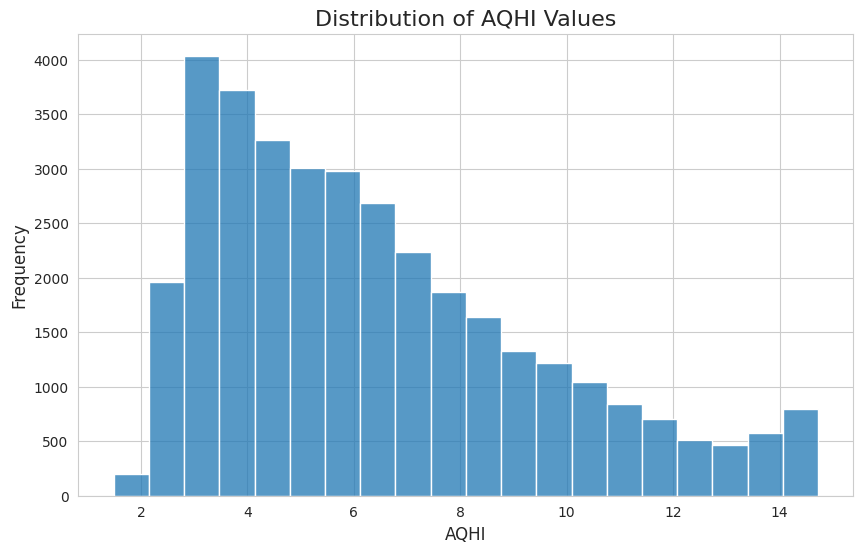

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a histogram/bar chart of the AQHI values
plt.figure(figsize=(10, 6))
sns.histplot(data=Beijing_df_IQR, x='AQHI', bins=20, kde=False)

# Setting the title and labels
plt.title('Distribution of AQHI Values', fontsize=16)
plt.xlabel('AQHI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [ ]:
Beijing_df_IQR.describe()

PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      75.418156    100.676213     13.458920     50.192591   1130.166460   
std       63.180391     71.935626     12.607359     28.070957    751.604780   
min        3.250000      4.083333      1.202333      4.166667    125.000000   
25%       22.767045     40.833333      3.583333     27.916667    548.958333   
50%       57.583333     86.083333      8.000000     45.500000    900.000000   
75%      109.170455    141.416667     19.916667     67.500000   1525.000000   
max      238.916667    292.333333     44.416667    126.818182   2991.666667   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      54.172825     13.531790   1010.754192      2.482738      0.064418   
std       45.754608     11.398510     10.212344     13.728385      0.602865   
min        1.000000    -16.625000    985.408333    -34.866667      0.000000   
25%       15.166667      3.133333   1002.241667     -8.941667      0.000000   
50%       43.583333     14.508333   1010.525000      2.966667      0.000000   
75%       78.750000     23.241667   1019.083333     15.158333      0.000000   
max      174.083333     40.425000   1040.158333     27.900000     25.008333   

               WSPM       sin_dir       cos_dir  wind_direction  \
count  35064.000000  35064.000000  35064.000000    35064.000000   
mean       1.657604      0.061473      0.116191        0.040252   
std        0.860250      0.451411      0.528805        1.676959   
min        0.066667     -0.993657     -0.990485       -3.141174   
25%        1.000000     -0.320054     -0.335174       -1.107149   
50%        1.425000      0.122706      0.218377        0.321852   
75%        2.150000      0.430543      0.579885        1.178097   
max        3.891667      0.980970      0.987313        3.141593   

       wind_direction_degrees          AQHI  
count            35064.000000  35064.000000  
mean                 2.306262      6.416657  
std                 96.082670      3.070556  
min               -179.976024      1.487070  
25%                -63.434949      3.920780  
50%                 18.440779      5.748682  
75%                 67.500000      8.242647  
max                180.000000     14.724187

In [ ]:
Beijing_df_IQR

PM2.5       PM10       SO2        NO2          CO  \
datetime                                                                     
2013-03-01 00:00:00   5.666667   7.916667  5.666667  12.600000  308.333333   
2013-03-01 01:00:00   6.833333   9.833333  5.333333  13.111111  308.333333   
2013-03-01 02:00:00   5.666667   7.250000  8.166667  12.900000  300.000000   
2013-03-01 03:00:00   6.000000   9.250000  5.833333  12.400000  283.333333   
2013-03-01 04:00:00   4.833333   6.916667  6.750000  14.000000  308.333333   
...                        ...        ...       ...        ...         ...   
2017-02-28 19:00:00  16.083333  38.416667  3.583333  28.818182  408.333333   
2017-02-28 20:00:00  19.000000  38.166667  5.083333  41.666667  533.333333   
2017-02-28 21:00:00  15.666667  33.083333  5.000000  40.833333  558.333333   
2017-02-28 22:00:00  13.666667  29.666667  5.500000  40.166667  591.666667   
2017-02-28 23:00:00  15.000000  31.833333  6.500000  50.416667  658.333333   

                            O3       TEMP         PRES       DEWP  RAIN  \
datetime                                                                  
2013-03-01 00:00:00  75.416667  -0.916667  1022.766667 -19.900000   0.0   
2013-03-01 01:00:00  75.750000  -1.216667  1023.191667 -19.916667   0.0   
2013-03-01 02:00:00  66.000000  -1.591667  1023.325000 -21.008333   0.0   
2013-03-01 03:00:00  75.333333  -1.891667  1024.208333 -21.833333   0.0   
2013-03-01 04:00:00  66.333333  -2.283333  1024.866667 -21.625000   0.0   
...                        ...        ...          ...        ...   ...   
2017-02-28 19:00:00  71.900000  12.000000  1011.950000 -15.133333   0.0   
2017-02-28 20:00:00  56.545455  10.933333  1012.141667 -14.191667   0.0   
2017-02-28 21:00:00  54.000000  10.041667  1012.625000 -13.558333   0.0   
2017-02-28 22:00:00  53.250000   9.225000  1012.841667 -13.166667   0.0   
2017-02-28 23:00:00  41.000000   7.741667  1012.558333 -14.158333   0.0   

                         WSPM   sin_dir   cos_dir  wind_direction  \
datetime                                                            
2013-03-01 00:00:00  3.875000 -0.296506  0.643571       -0.431733   
2013-03-01 01:00:00  3.875000 -0.249528  0.717289       -0.334782   
2013-03-01 02:00:00  3.620833 -0.309193  0.707352       -0.412086   
2013-03-01 03:00:00  3.366667 -0.346071  0.775598       -0.419688   
2013-03-01 04:00:00  2.716667 -0.340467  0.847333       -0.382066   
...                       ...       ...       ...             ...   
2017-02-28 19:00:00  2.141667 -0.481986  0.699747       -0.603170   
2017-02-28 20:00:00  1.275000 -0.688671  0.366979       -1.081192   
2017-02-28 21:00:00  1.350000 -0.235702  0.686887       -0.330556   
2017-02-28 22:00:00  1.466667 -0.218377  0.779487       -0.273152   
2017-02-28 23:00:00  1.391667  0.341083  0.906781        0.359776   

                     wind_direction_degrees      AQHI  
datetime                                               
2013-03-01 00:00:00              -24.736459  3.062696  
2013-03-01 01:00:00              -19.181605  3.129724  
2013-03-01 02:00:00              -23.610769  2.785572  
2013-03-01 03:00:00              -24.046378  3.059368  
2013-03-01 04:00:00              -21.890749  2.827127  
...                                     ...       ...  
2017-02-28 19:00:00              -34.559112  4.035945  
2017-02-28 20:00:00              -61.947727  4.282490  
2017-02-28 21:00:00              -18.939440  4.071514  
2017-02-28 22:00:00              -15.650469  3.960568  
2017-02-28 23:00:00               20.613652  4.138015  

[35064 rows x 16 columns]

In [ ]:
Beijing_df_IQR.to_csv('Beijing_outlier_removed.csv', index=False)

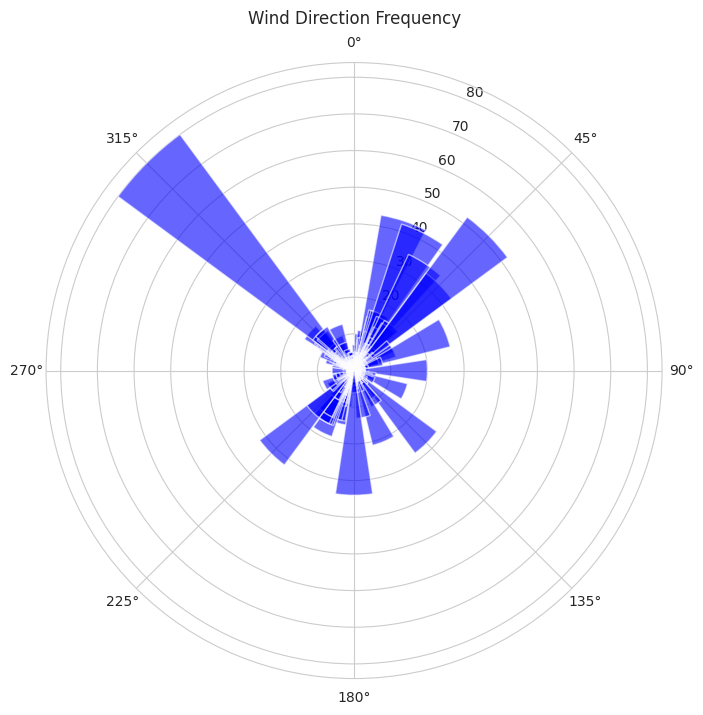

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'combined_df' is your DataFrame and it contains 'sin_dir', 'cos_dir', and 'wind_direction_degrees'

# Group by the 'wind_direction_degrees' to get the frequency of each direction
direction_counts = Beijing_df_IQR.groupby('wind_direction_degrees').size().reset_index(name='frequency')

# Calculate the angles from the 'wind_direction_degrees' column
angles = np.deg2rad(direction_counts['wind_direction_degrees'])

# Get the frequency values
frequency = direction_counts['frequency']

# Ensure the plot connects back to the start by completing the loop
angles = np.concatenate((angles, [angles[0]]))
frequency = np.concatenate((frequency, [frequency[0]]))

# Start the polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw the bars with the frequency of wind direction occurrences
ax.bar(angles, frequency, width=0.3, color='b', alpha=0.6)

# Set the direction of the zero angle
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)  # The angles go clockwise

# Set the title and show the plot
ax.set_title('Wind Direction Frequency', va='bottom')

plt.show()